# ANTALYA PROVINCE - ATMOS DATA

# Import libraries and load data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
color_pal = sns.color_palette()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates

In [2]:
path = r"C:\Users\hp\Research-Try-ML\Models\ANTALYA-20072023-DONE.csv"
df = pd.read_csv(path, encoding='latin1')

### Set Index as Datetime
df = df.set_index('Date')

#Change Datetime Datatype to Datetime
df.index = pd.to_datetime(df.index)
df

Temp(°C)  DewPoint(°C)  Humidi(%)  WindSpeed(mps)  Press(hpa)  \
Date                                                                         
2007-01-01   8.777778     -3.277778       48.2        3.755029  1022.68978   
2007-01-02   8.611111      1.055556       62.6        2.145731  1022.68978   
2007-01-03  12.277778      9.111111       81.6        5.364327  1015.91700   
2007-01-04  11.000000      8.444444       85.1        5.721949  1009.14422   
2007-01-05   8.277778      4.444444       77.9        4.291462  1005.75783   
...               ...           ...        ...             ...         ...   
2023-12-27  15.055556      7.833333       63.5        3.576218  1015.91700   
2023-12-28  15.555556      6.333333       55.6        3.263299  1015.91700   
2023-12-29  13.222222      7.444444       69.3        2.413947  1015.91700   
2023-12-30  12.666667      8.833333       77.5        2.235136  1015.91700   
2023-12-31  13.944444      9.111111       75.3        2.905677  1015.91700   

            SST(°C)  
Date                 
2007-01-01     17.9  
2007-01-02     17.9  
2007-01-03     17.7  
2007-01-04     17.5  
2007-01-05     17.4  
...             ...  
2023-12-27     21.0  
2023-12-28     20.8  
2023-12-29     20.8  
2023-12-30     20.8  
2023-12-31     20.5  

[6209 rows x 6 columns]

In [6]:
df_cols = df[["Temp(°C)", "DewPoint(°C)", "Humidi(%)", "WindSpeed(mps)", "Press(hpa)", "SST(°C)"]]

In [7]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [8]:
import pandas as pd

def add_year_and_season(df):
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)
    df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
    return df


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_by_year_and_season(df, feature):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(data=df.dropna(),
                x='Year',
                y=feature,
                hue='Season',
                ax=ax,
                linewidth=1)
    ax.set_title(f'{feature} by Year and Season')
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend(bbox_to_anchor=(1, 1))
    plt.show()


In [10]:
import pandas as pd

def add_year_and_month(df):
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    return df

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_by_year_and_month(df, feature):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.boxplot(data=df.dropna(),
                x='Year',
                y=feature,
                hue='Month',
                ax=ax,
                linewidth=1)
    ax.set_title(f'{feature} by Year and Month')
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend(bbox_to_anchor=(1, 1))
    plt.show()

# Overview for all data

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

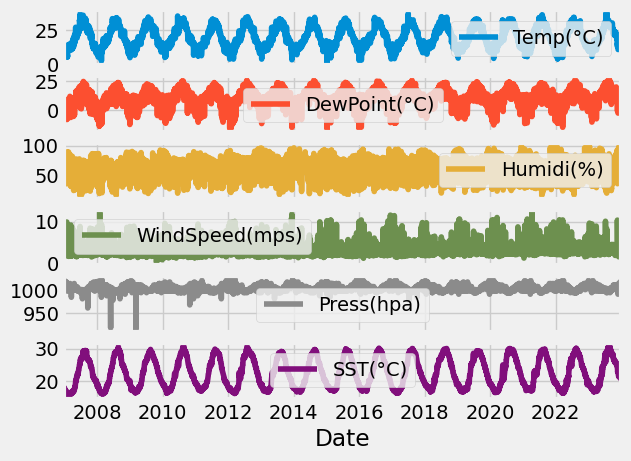

In [9]:
df[["Temp(°C)", "DewPoint(°C)", "Humidi(%)", "WindSpeed(mps)", "Press(hpa)", "SST(°C)"]].plot(subplots=True)

# Plot Trend for each feature 1)Plot 2) Seasonal trend 3) Auto and Partial Correlation 4) Boxplot 5) Histogram 6) Boxplots yearly by season 7) Heatmap by Year and month 8) Descriptive Statistics

## Air Tempreature in Celsius

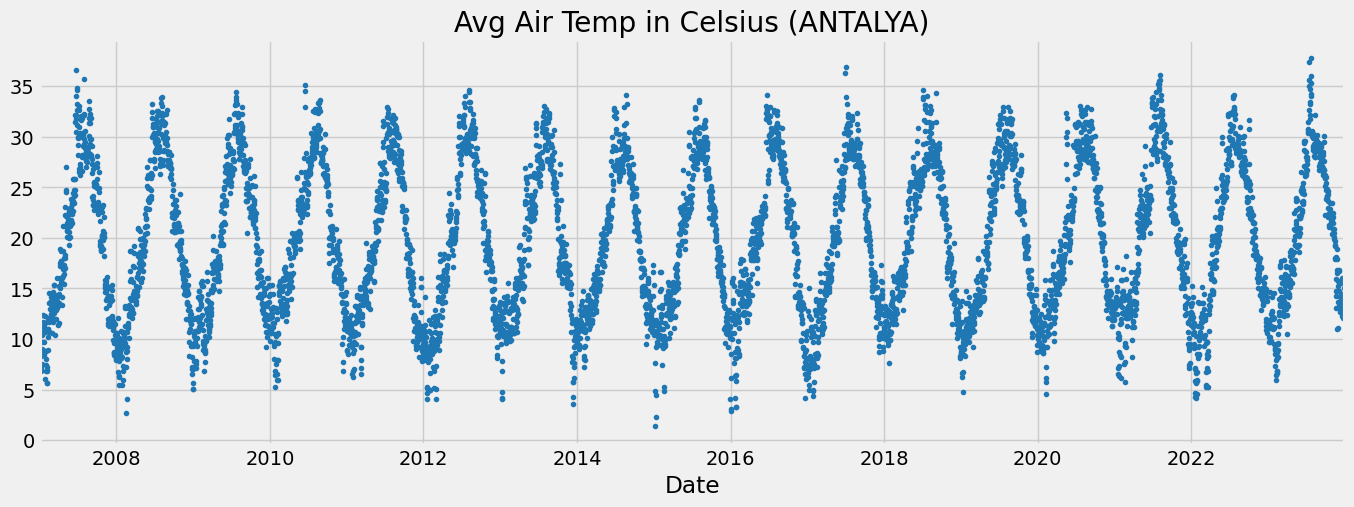

In [10]:
df["Temp(°C)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Air Temp in Celsius (ANTALYA)');

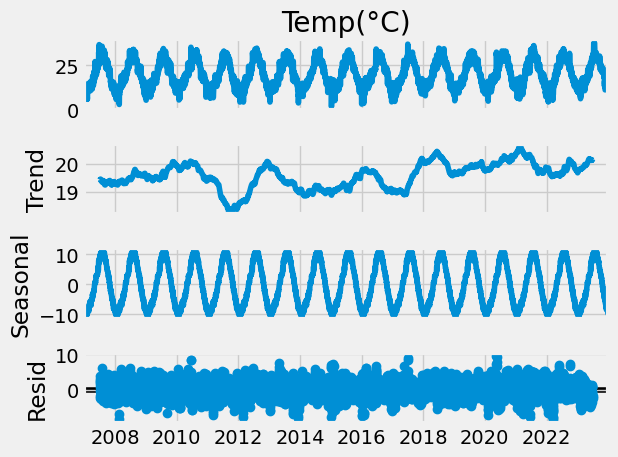

In [11]:
result1 = seasonal_decompose(df['Temp(°C)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

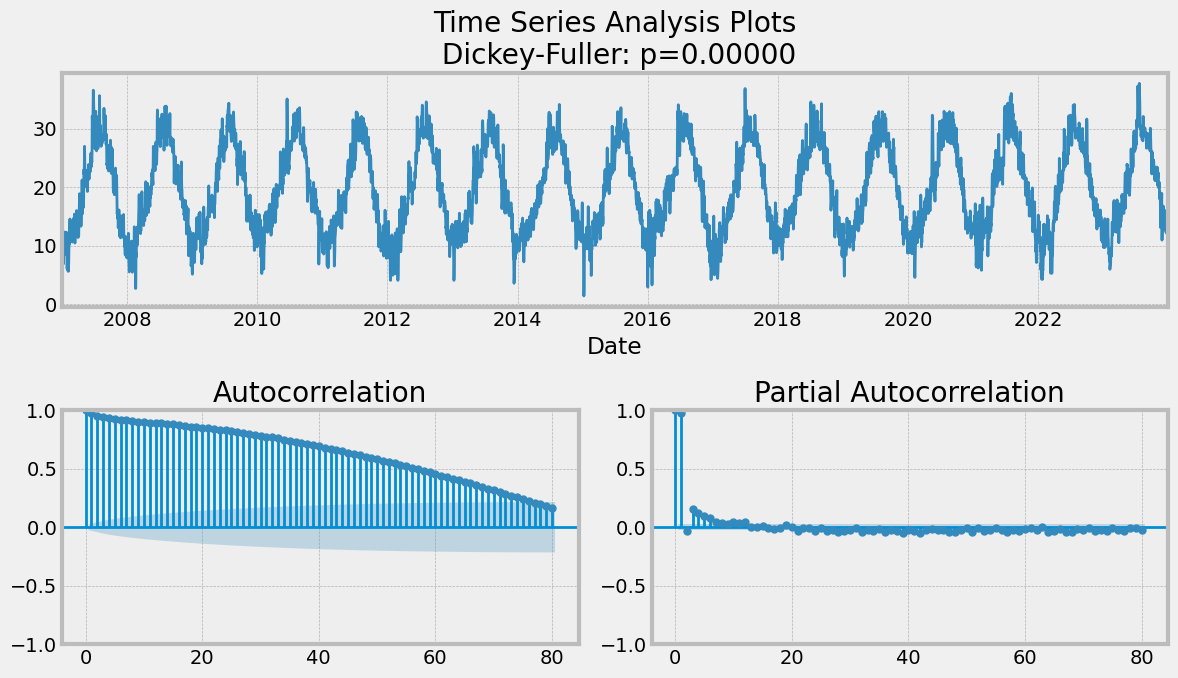

In [12]:
tsplot(df["Temp(°C)"], lags=80)

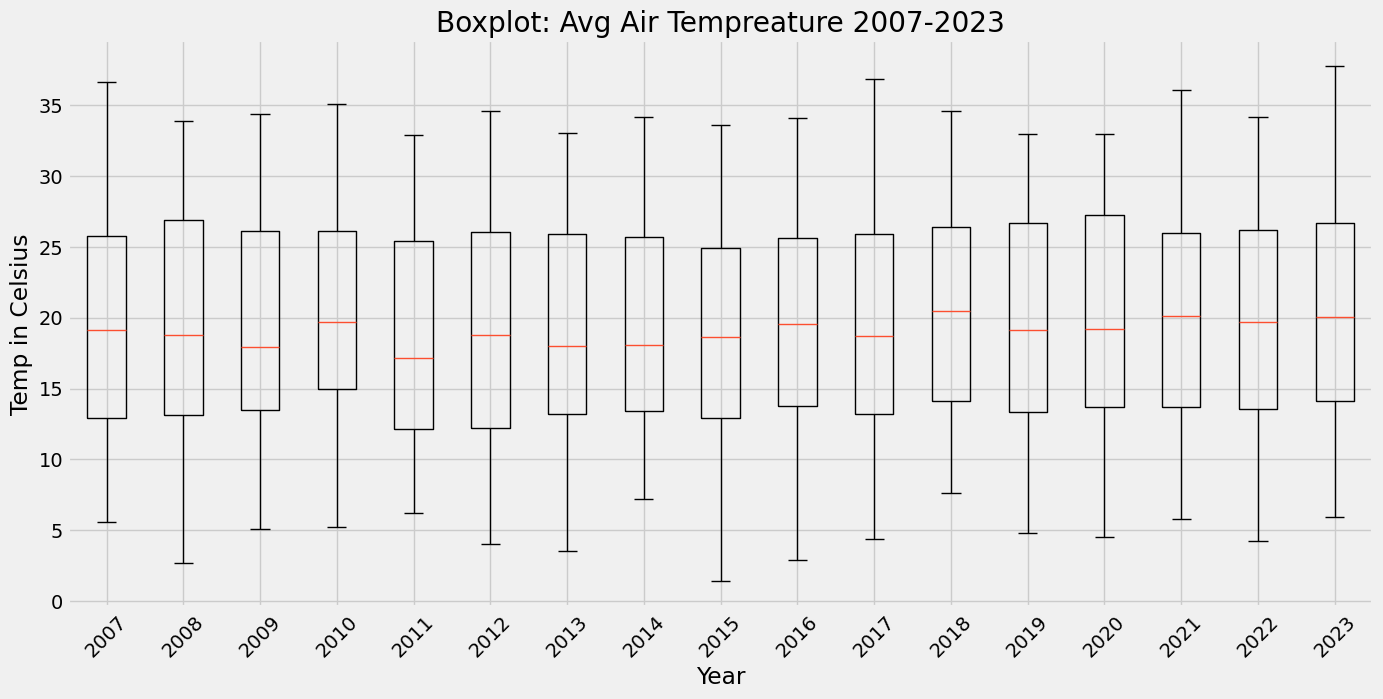

In [13]:
# Extract the year from the index and create a new column for it
df['Year'] = df.index.year

# Create a list to hold the data for each year
data_per_year = [df[df['Year'] == year]['Temp(°C)'] for year in df['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Temp in Celsius")
plt.title("Boxplot: Avg Air Tempreature 2007-2023")
plt.xticks(rotation=45)
plt.show()

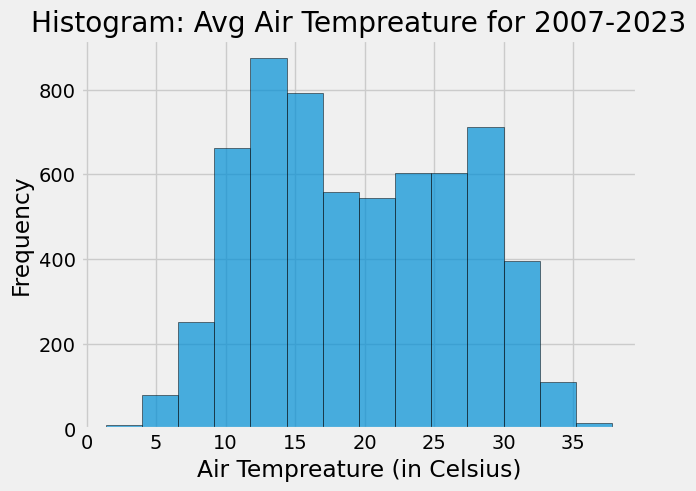

In [14]:
plt.hist(df["Temp(°C)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Air Tempreature (in Celsius)")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Air Tempreature for 2007-2023")


# Show the plot
plt.grid(True)
plt.show()

Available features: ['Temp(°C)', 'DewPoint(°C)', 'Humidi(%)', 'WindSpeed(mps)', 'Press(hpa)', 'SST(°C)', 'Year', 'Month', 'Season']


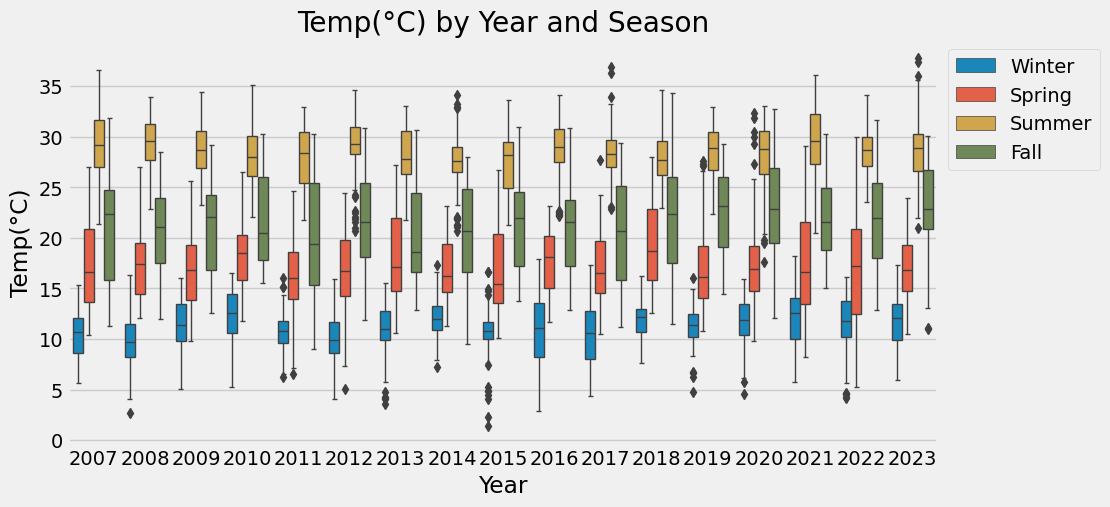

In [15]:
# Add 'year' and 'season' columns to the DataFrame
df = add_year_and_season(df)

# List all features
features = df.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'Temp(°C)'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df, feature_to_plot)

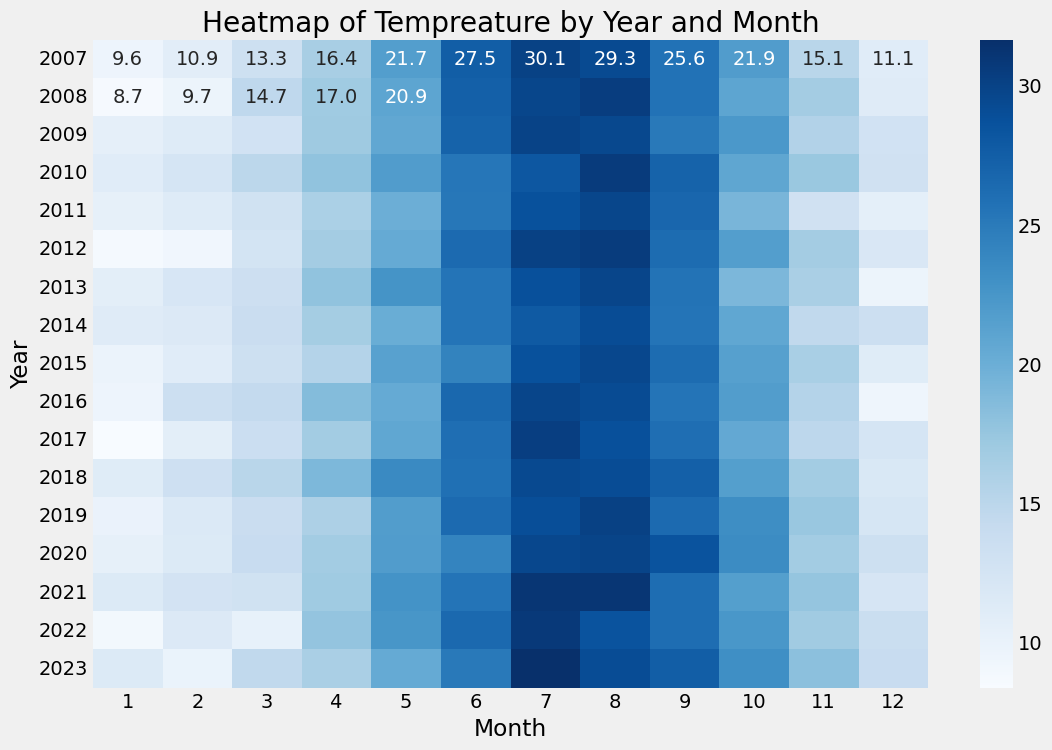

In [16]:
# Pivot the data to create a matrix for the heatmap
df_pivot = df.pivot_table(values='Temp(°C)', index=df.index.year, columns=df.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Tempreature by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [17]:
df["Temp(°C)"].describe()

count    6209.000000
mean       19.599524
std         7.277966
min         1.388889
25%        13.444444
50%        19.000000
75%        26.166667
max        37.777778
Name: Temp(°C), dtype: float64

## Dew Point in Celsius

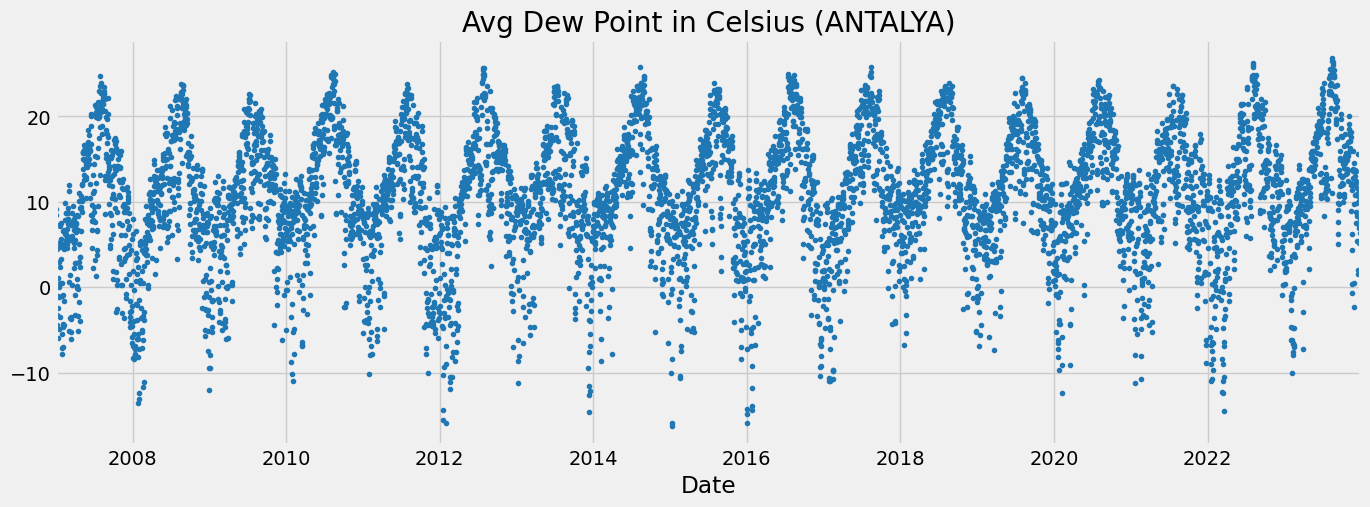

In [18]:
df["DewPoint(°C)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Dew Point in Celsius (ANTALYA)');

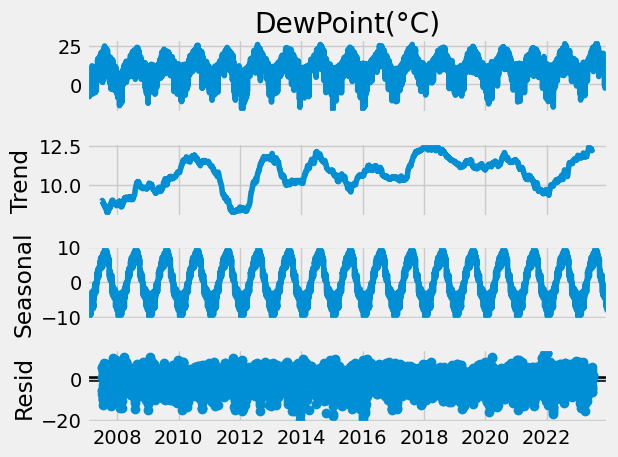

In [19]:
result1 = seasonal_decompose(df['DewPoint(°C)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

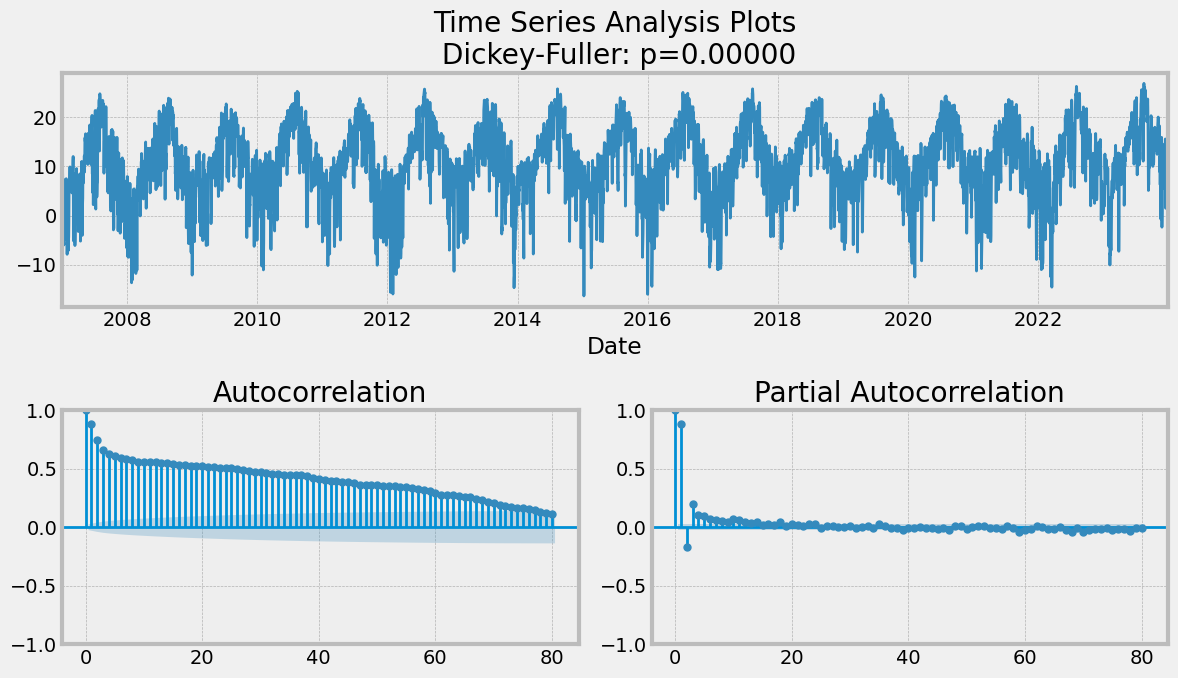

In [20]:
tsplot(df["DewPoint(°C)"], lags=80)

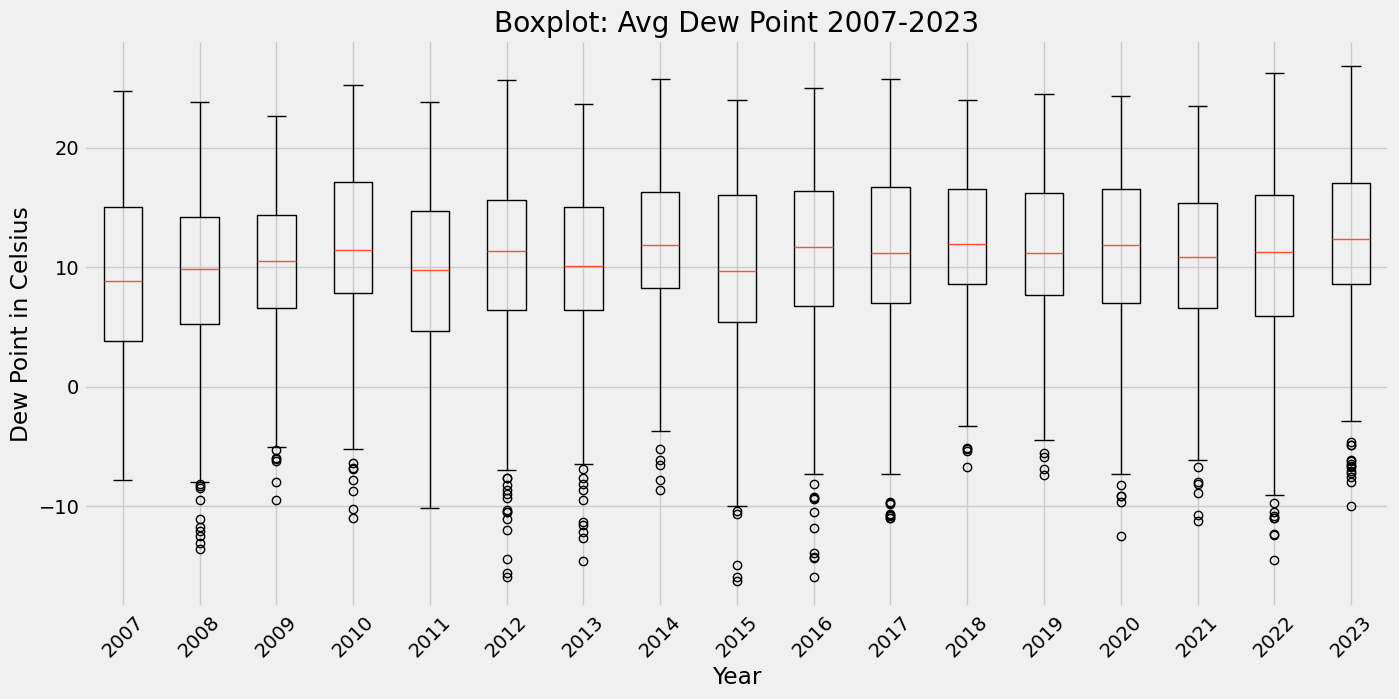

In [21]:
# Extract the year from the index and create a new column for it
df['Year'] = df.index.year

# Create a list to hold the data for each year
data_per_year = [df[df['Year'] == year]['DewPoint(°C)'] for year in df['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Dew Point in Celsius")
plt.title("Boxplot: Avg Dew Point 2007-2023")
plt.xticks(rotation=45)
plt.show()

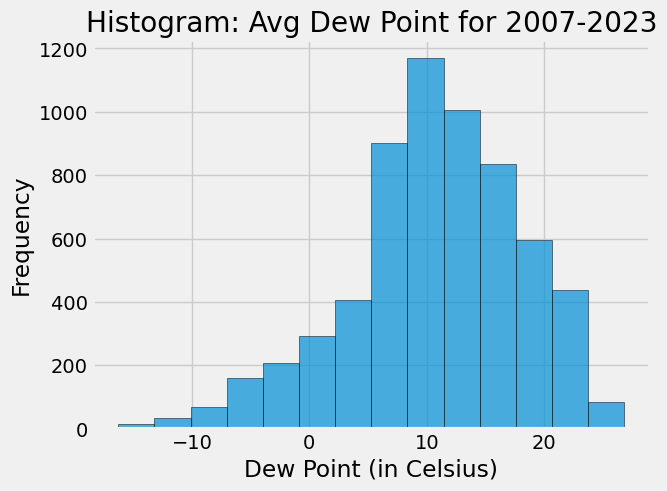

In [22]:
plt.hist(df["DewPoint(°C)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Dew Point (in Celsius)")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Dew Point for 2007-2023")


# Show the plot
plt.grid(True)
plt.show()

Available features: ['Temp(°C)', 'DewPoint(°C)', 'Humidi(%)', 'WindSpeed(mps)', 'Press(hpa)', 'SST(°C)', 'Year', 'Month', 'Season']


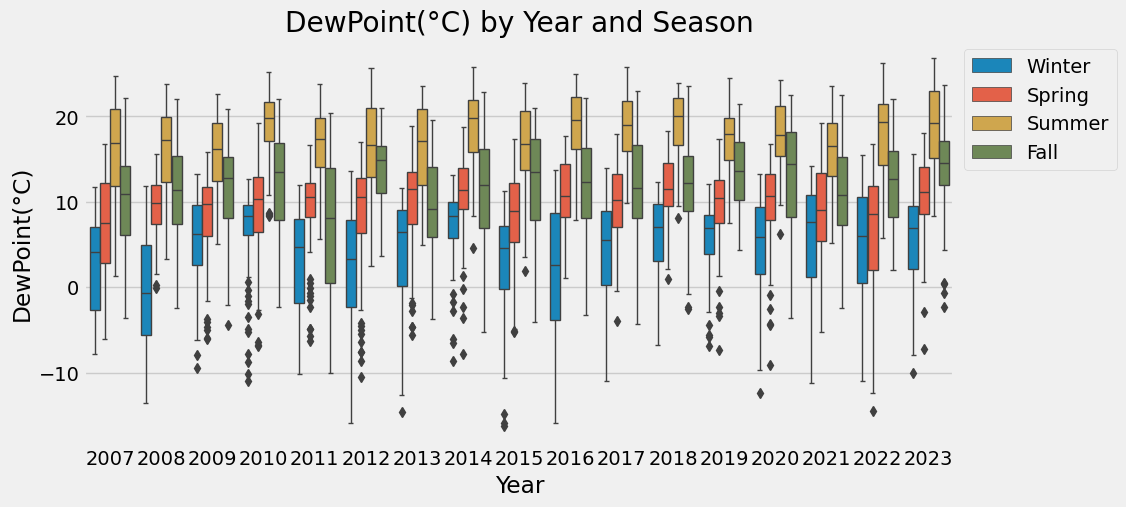

In [23]:
# Add 'year' and 'season' columns to the DataFrame
df = add_year_and_season(df)

# List all features
features = df.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'DewPoint(°C)'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df, feature_to_plot)

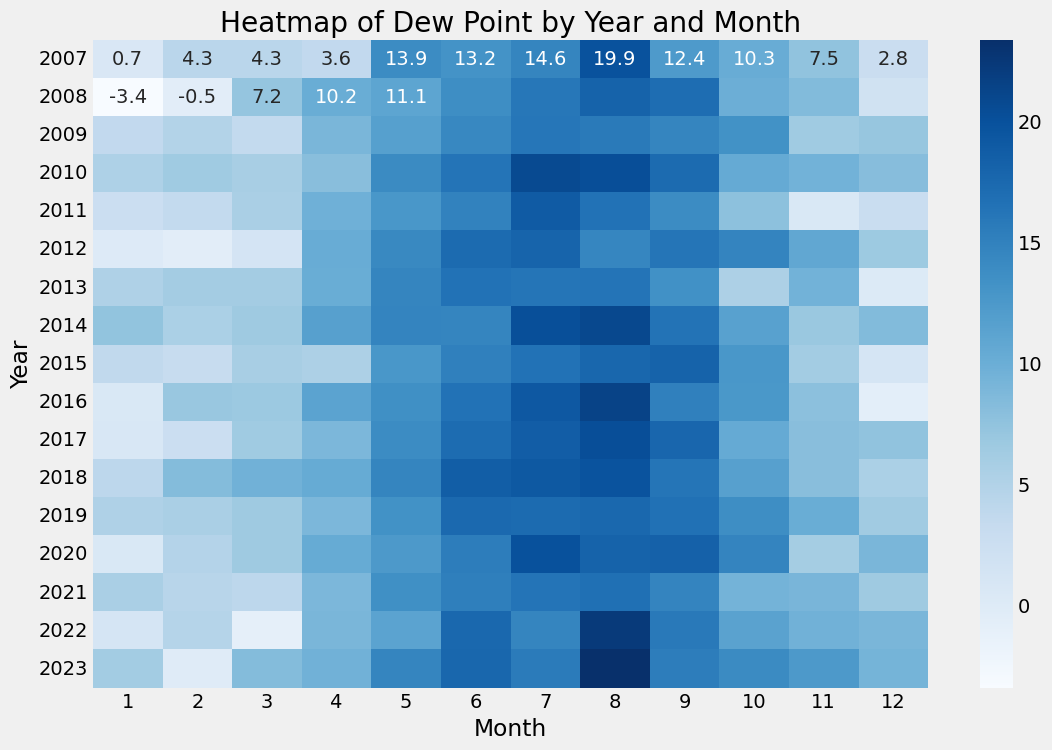

In [24]:
# Pivot the data to create a matrix for the heatmap
df_pivot = df.pivot_table(values='DewPoint(°C)', index=df.index.year, columns=df.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Dew Point by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [25]:
df["DewPoint(°C)"].describe()

count    6209.000000
mean       10.701294
std         7.351244
min       -16.277778
25%         6.666667
50%        11.000000
75%        15.888889
max        26.833333
Name: DewPoint(°C), dtype: float64

## Humidity in %

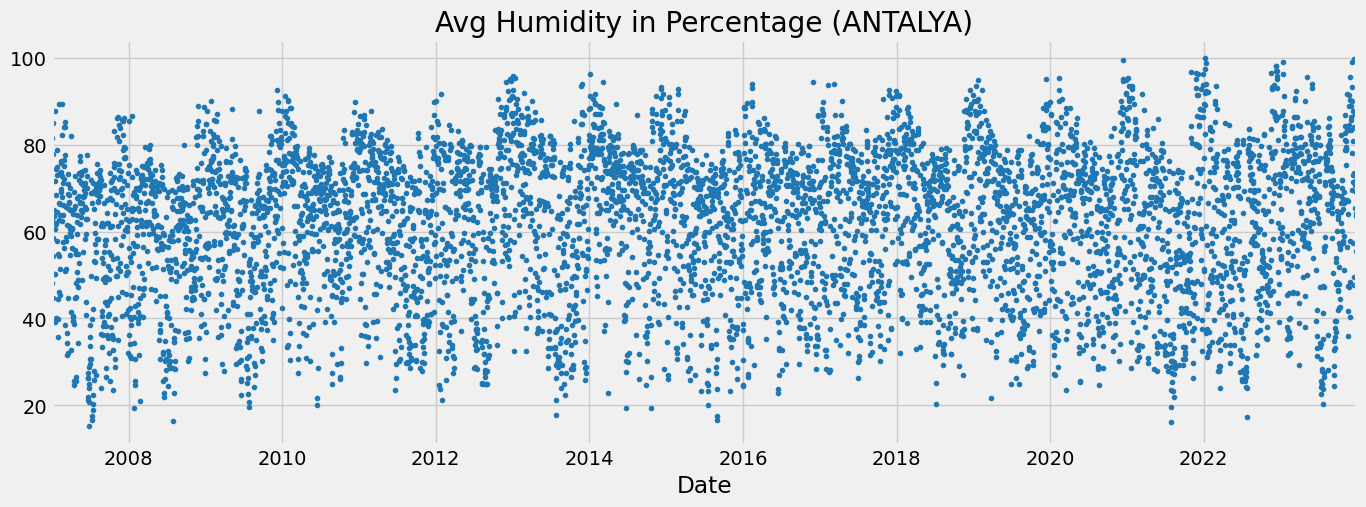

In [26]:
df["Humidi(%)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Humidity in Percentage (ANTALYA)');

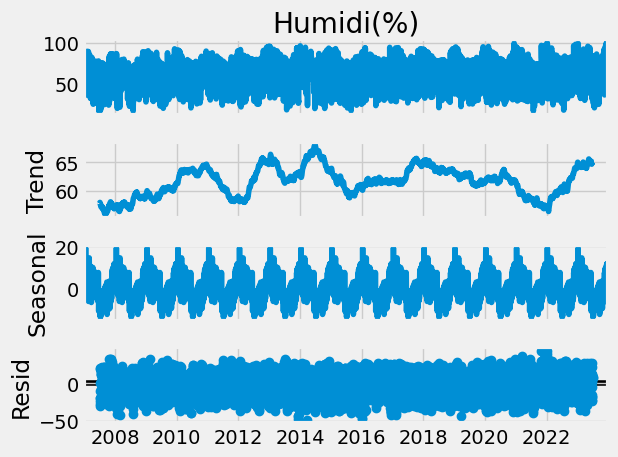

In [27]:
result1 = seasonal_decompose(df['Humidi(%)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

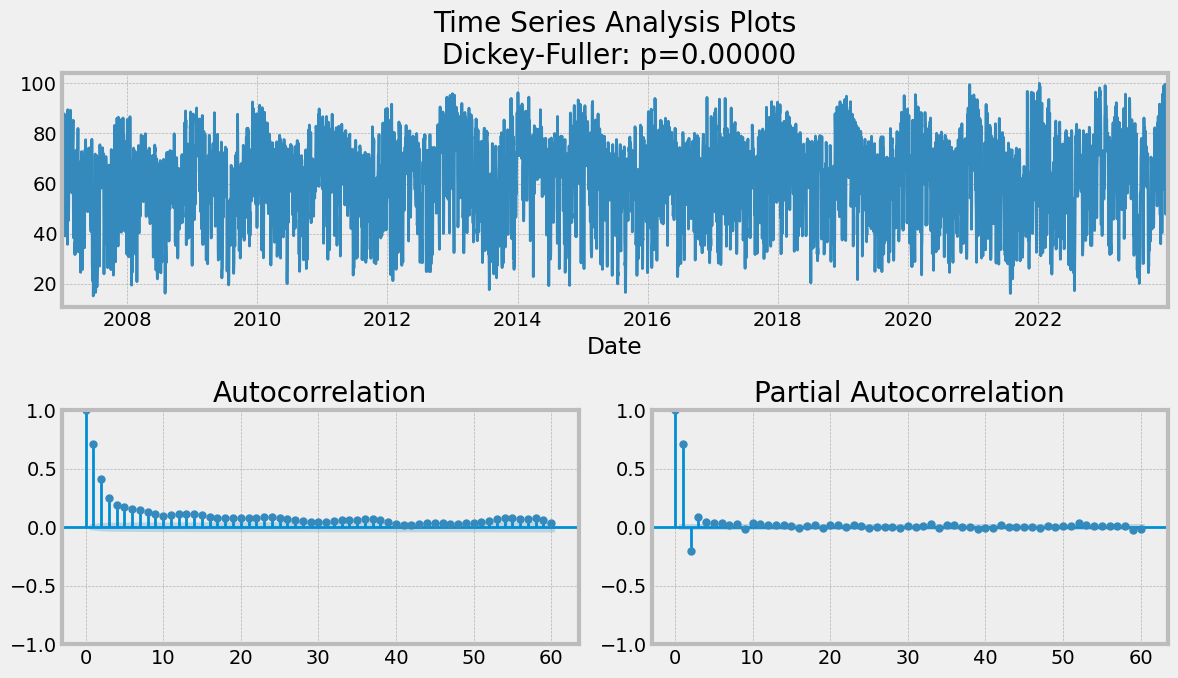

In [28]:
tsplot(df["Humidi(%)"], lags=60)

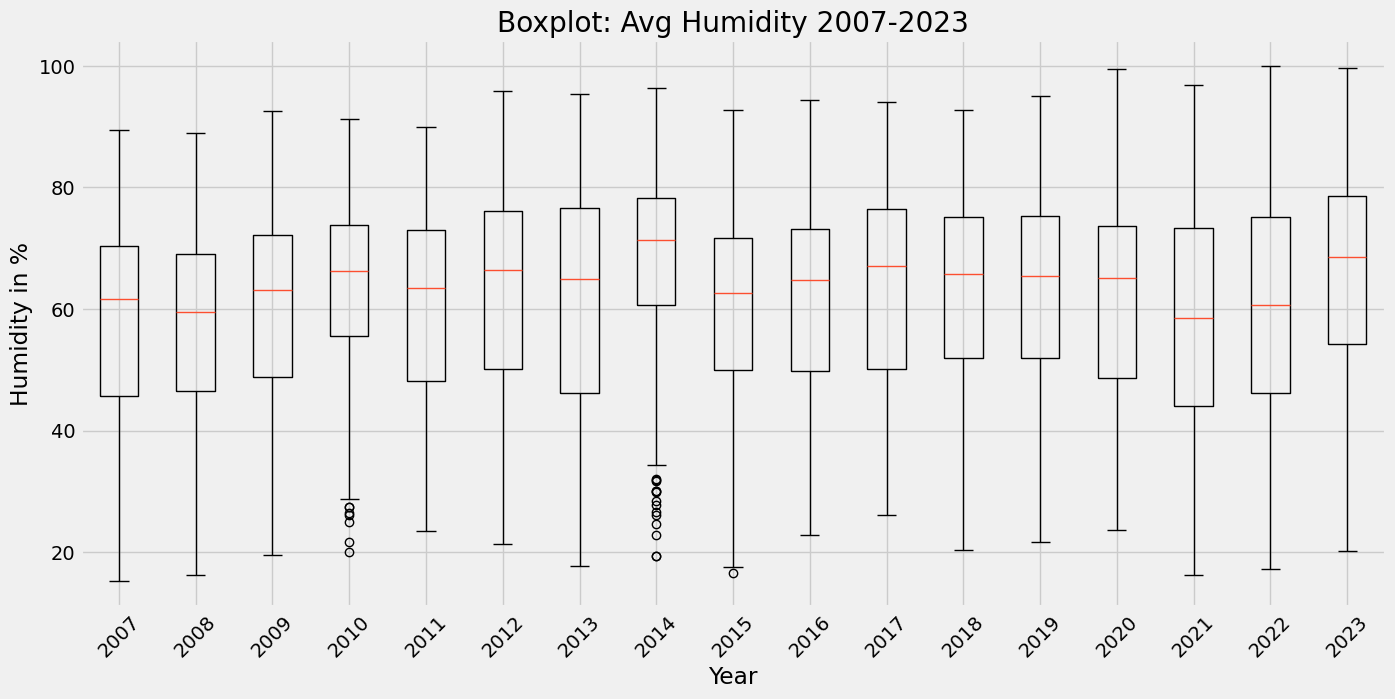

In [29]:
# Extract the year from the index and create a new column for it
df['Year'] = df.index.year

# Create a list to hold the data for each year
data_per_year = [df[df['Year'] == year]['Humidi(%)'] for year in df['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Humidity in %")
plt.title("Boxplot: Avg Humidity 2007-2023")
plt.xticks(rotation=45)
plt.show()

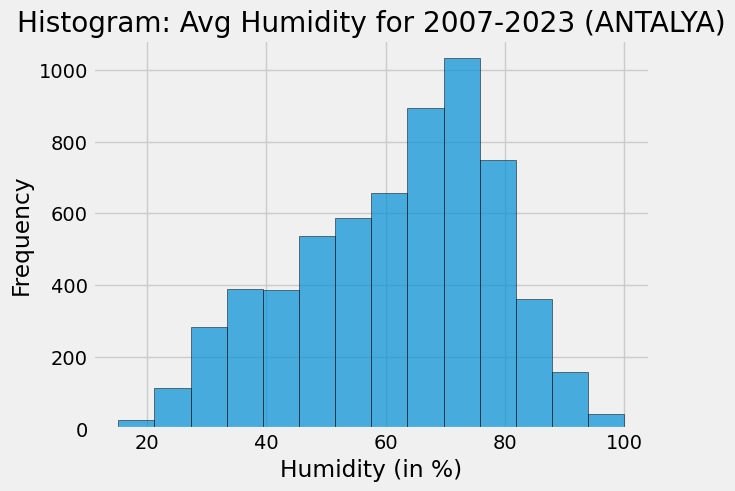

In [30]:
plt.hist(df["Humidi(%)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Humidity (in %)")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Humidity for 2007-2023 (ANTALYA)")


# Show the plot
plt.grid(True)
plt.show()

Available features: ['Temp(°C)', 'DewPoint(°C)', 'Humidi(%)', 'WindSpeed(mps)', 'Press(hpa)', 'SST(°C)', 'Year', 'Month', 'Season']


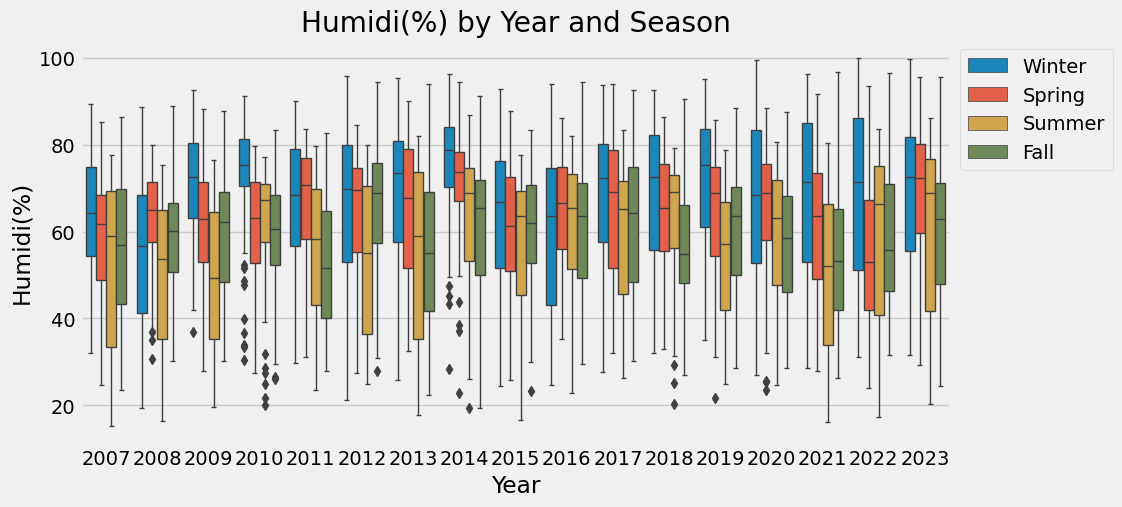

In [31]:
# Add 'year' and 'season' columns to the DataFrame
df = add_year_and_season(df)

# List all features
features = df.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'Humidi(%)'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df, feature_to_plot)

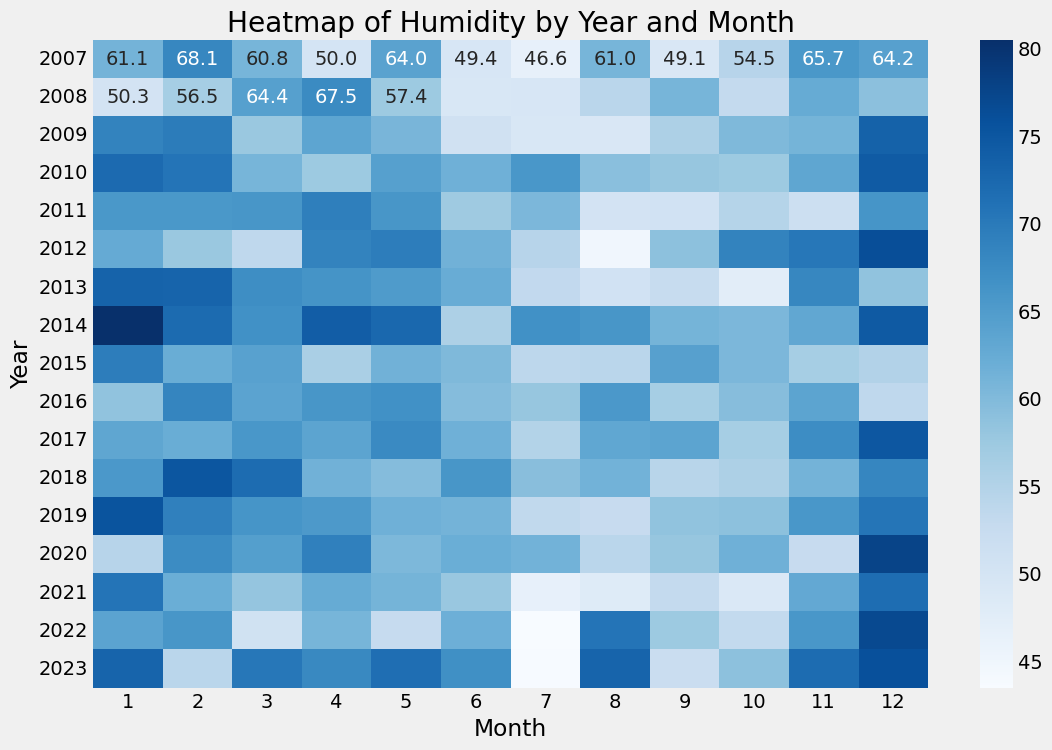

In [32]:
# Pivot the data to create a matrix for the heatmap
df_pivot = df.pivot_table(values='Humidi(%)', index=df.index.year, columns=df.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Humidity by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [33]:
df["Humidi(%)"].describe()

count    6209.000000
mean       61.614382
std        16.704142
min        15.200000
25%        49.600000
50%        64.700000
75%        74.200000
max       100.000000
Name: Humidi(%), dtype: float64

## Wind Speed in mps

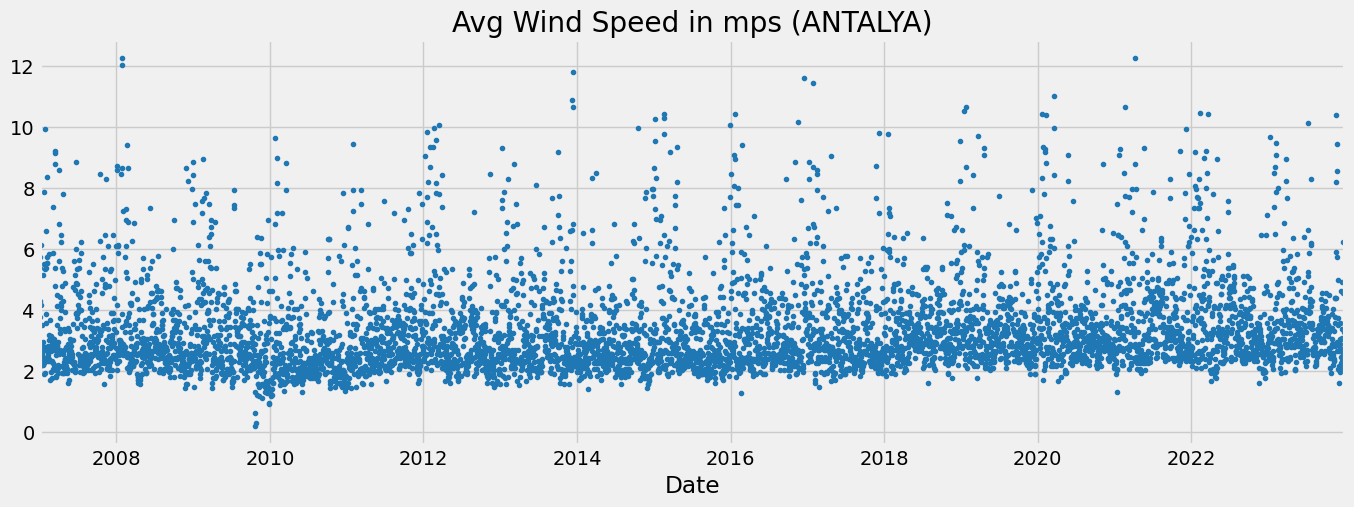

In [34]:
df["WindSpeed(mps)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Wind Speed in mps (ANTALYA)');

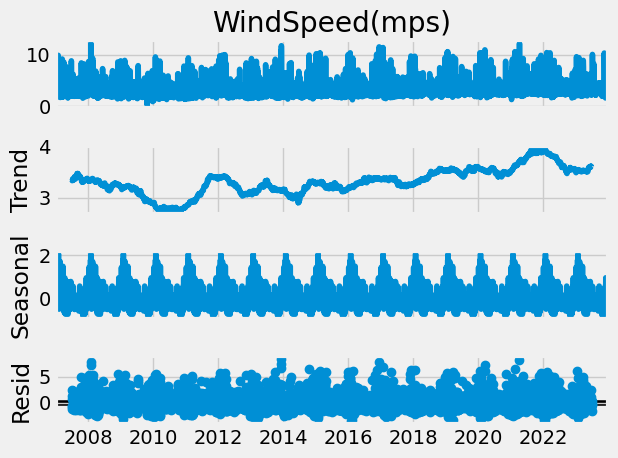

In [35]:
result1 = seasonal_decompose(df['WindSpeed(mps)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

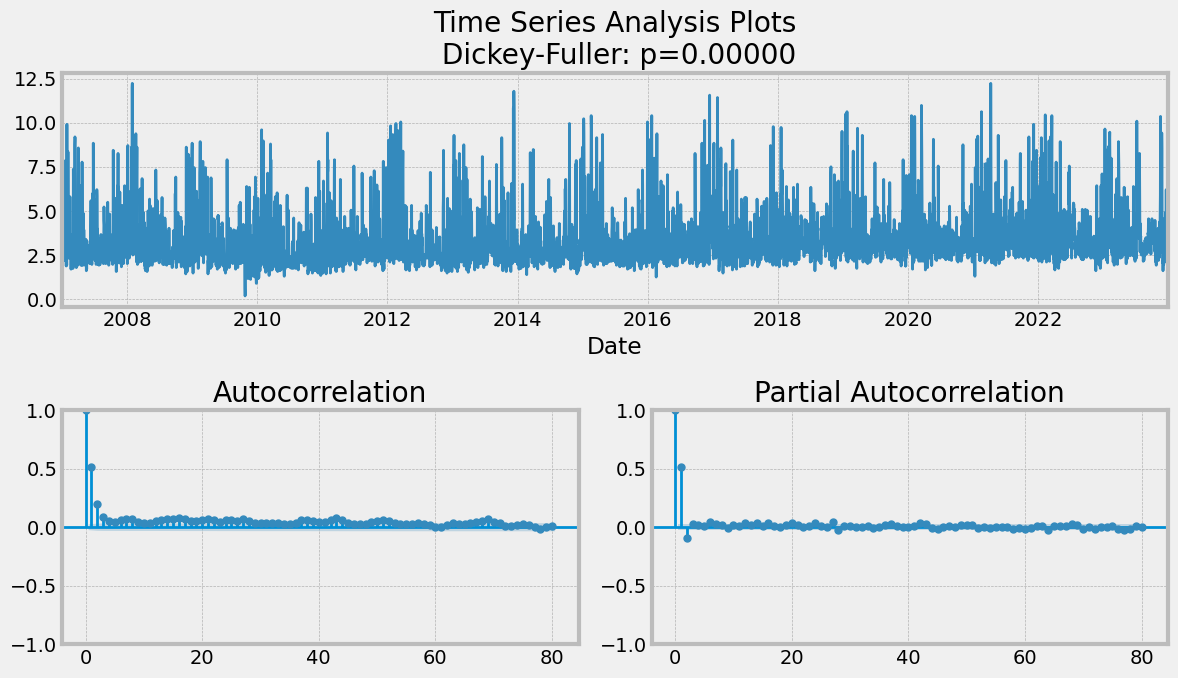

In [36]:
tsplot(df["WindSpeed(mps)"], lags=80)

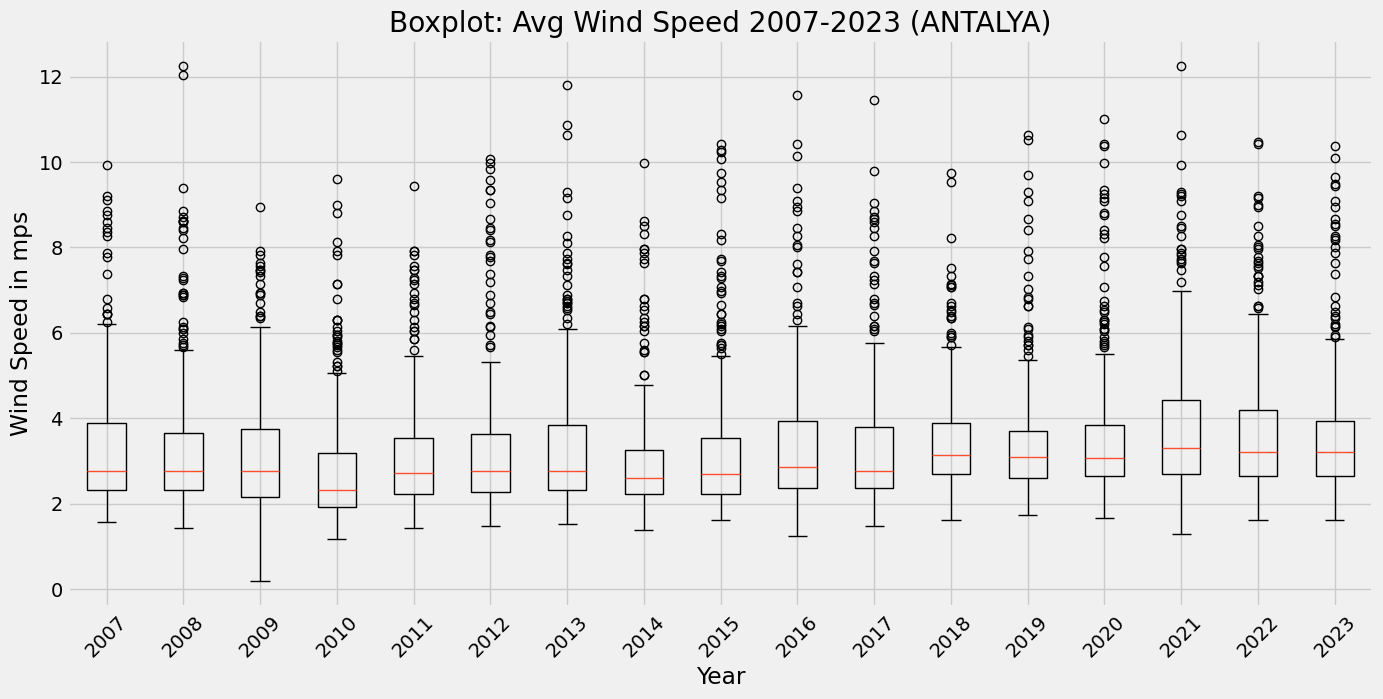

In [37]:
# Extract the year from the index and create a new column for it
df['Year'] = df.index.year

# Create a list to hold the data for each year
data_per_year = [df[df['Year'] == year]['WindSpeed(mps)'] for year in df['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Wind Speed in mps")
plt.title("Boxplot: Avg Wind Speed 2007-2023 (ANTALYA)")
plt.xticks(rotation=45)
plt.show()

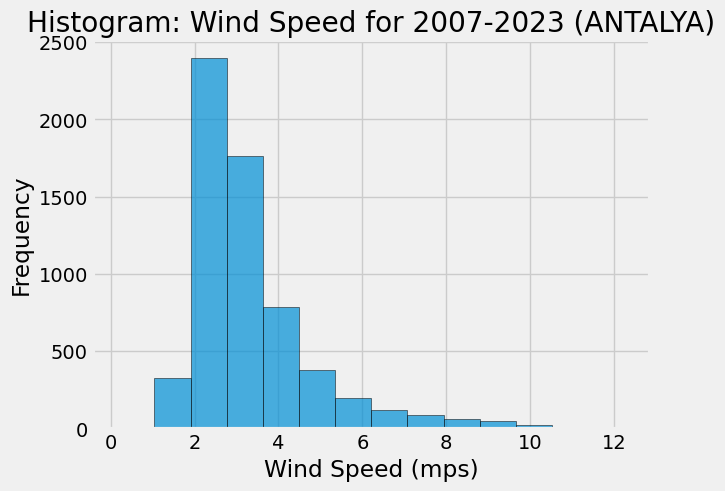

In [38]:
plt.hist(df["WindSpeed(mps)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Wind Speed (mps)")
plt.ylabel("Frequency")
plt.title("Histogram: Wind Speed for 2007-2023 (ANTALYA)")


# Show the plot
plt.grid(True)
plt.show()

Available features: ['Temp(°C)', 'DewPoint(°C)', 'Humidi(%)', 'WindSpeed(mps)', 'Press(hpa)', 'SST(°C)', 'Year', 'Month', 'Season']


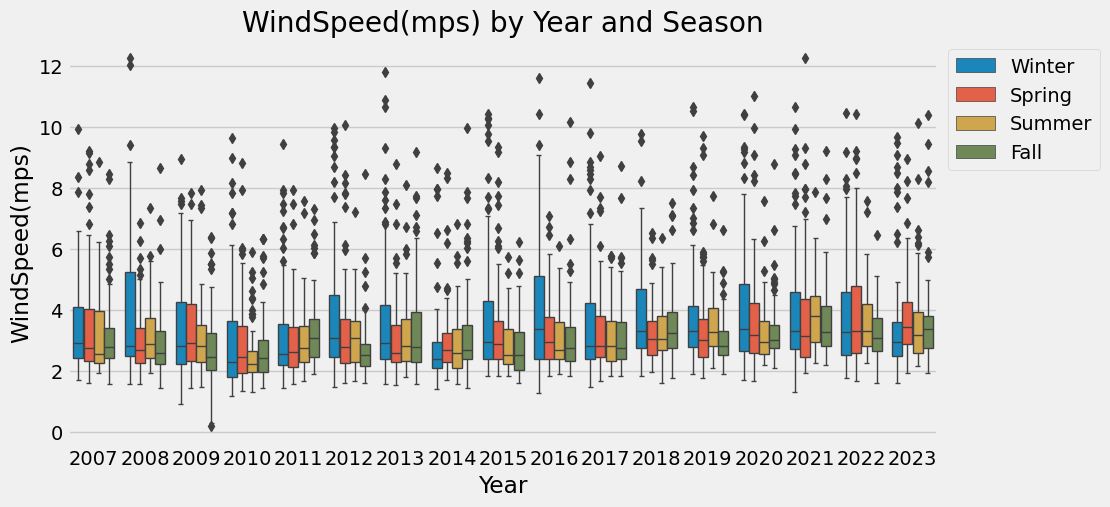

In [39]:
# Add 'year' and 'season' columns to the DataFrame
df = add_year_and_season(df)

# List all features
features = df.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'WindSpeed(mps)'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df, feature_to_plot)

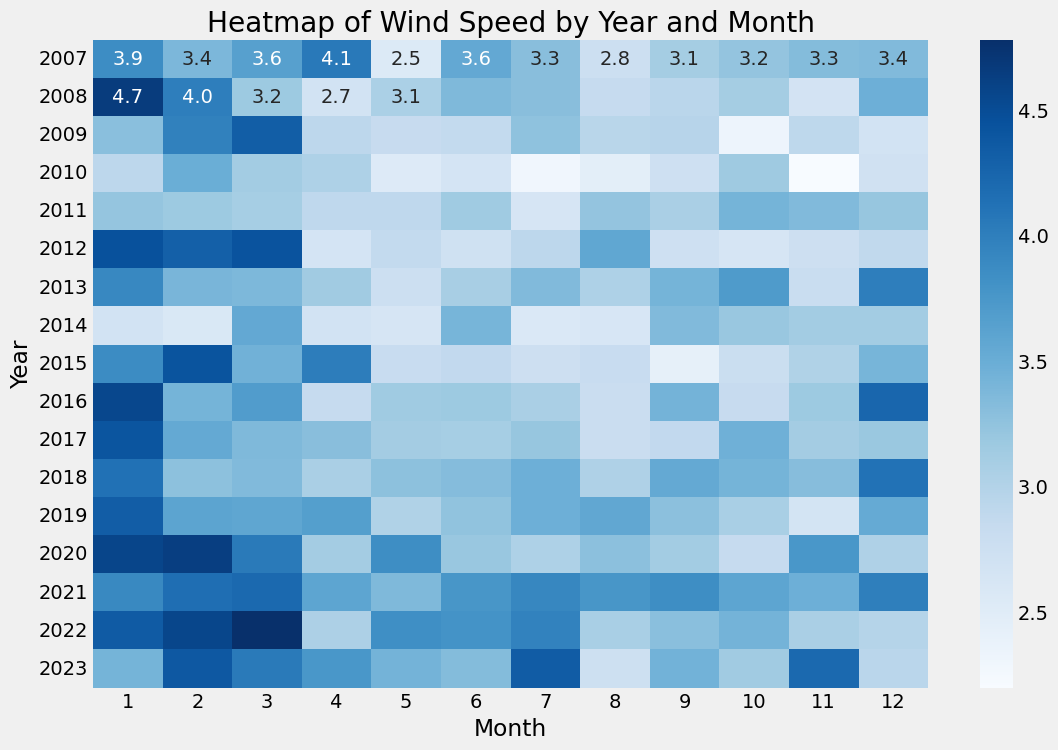

In [40]:
# Pivot the data to create a matrix for the heatmap
df_pivot = df.pivot_table(values='WindSpeed(mps)', index=df.index.year, columns=df.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Wind Speed by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [41]:
df["WindSpeed()"].describe()

KeyError: 'WindSpeed()'

## Pressure in hpa 

In [ ]:
df["Press(hpa)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Pressure in hpa (ANTALYA)');

In [ ]:
result1 = seasonal_decompose(df['Press(hpa)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

In [ ]:
tsplot(df["Press(hpa)"], lags=80)

In [ ]:
# Extract the year from the index and create a new column for it
df['Year'] = df.index.year

# Create a list to hold the data for each year
data_per_year = [df[df['Year'] == year]['Press(hpa)'] for year in df['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Pressure in hpa")
plt.title("Boxplot: Avg Pressure 2007-2023")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df["Press(hpa)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Pressure (in hpa)")
plt.ylabel("Frequency")
plt.title("Histogram: Pressure for 2007-2023")


# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Add 'year' and 'season' columns to the DataFrame
df = add_year_and_season(df)

# List all features
features = df.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'Press(hpa)'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df, feature_to_plot)

In [ ]:
# Pivot the data to create a matrix for the heatmap
df_pivot = df.pivot_table(values='Press(hpa)', index=df.index.year, columns=df.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Pressure by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
df["Press(hpa)"].describe()

## Sea Surface Tempreature in Celsius

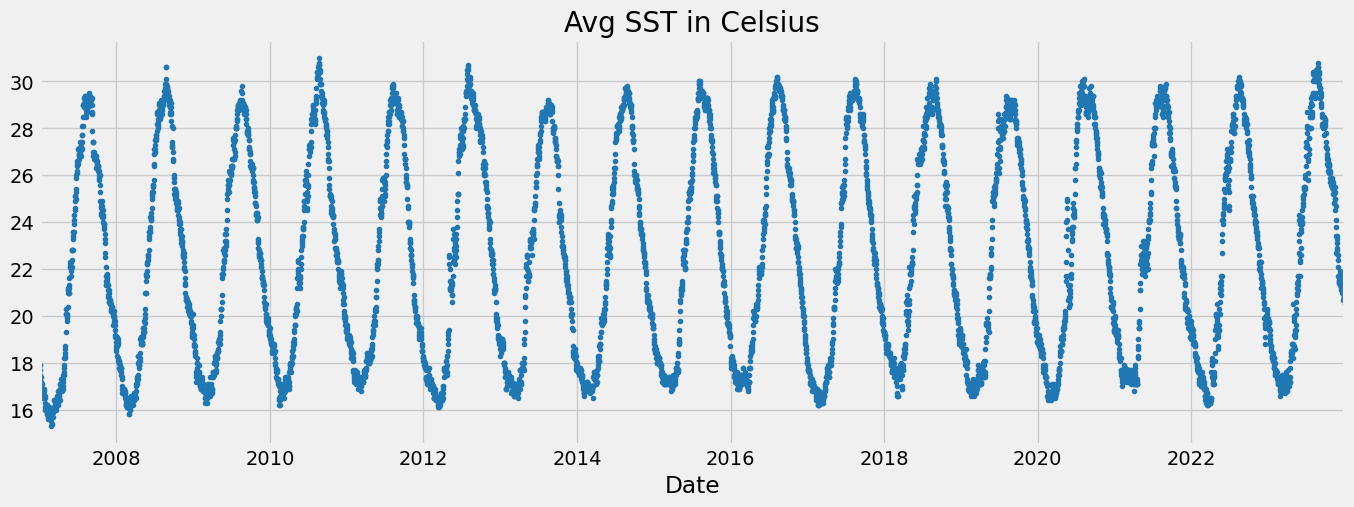

In [42]:
df["SST(°C)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg SST in Celsius');

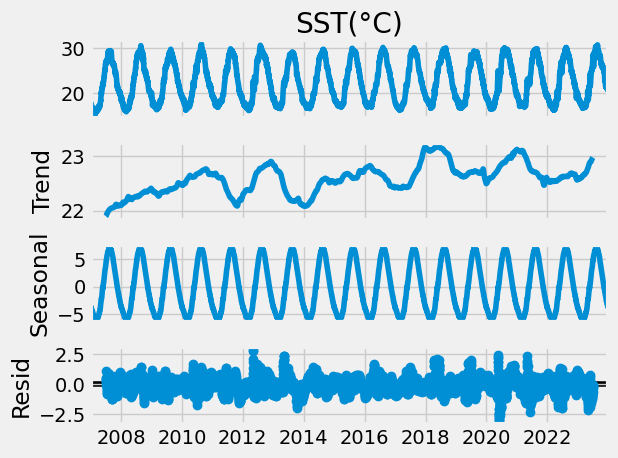

In [43]:
result1 = seasonal_decompose(df['SST(°C)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

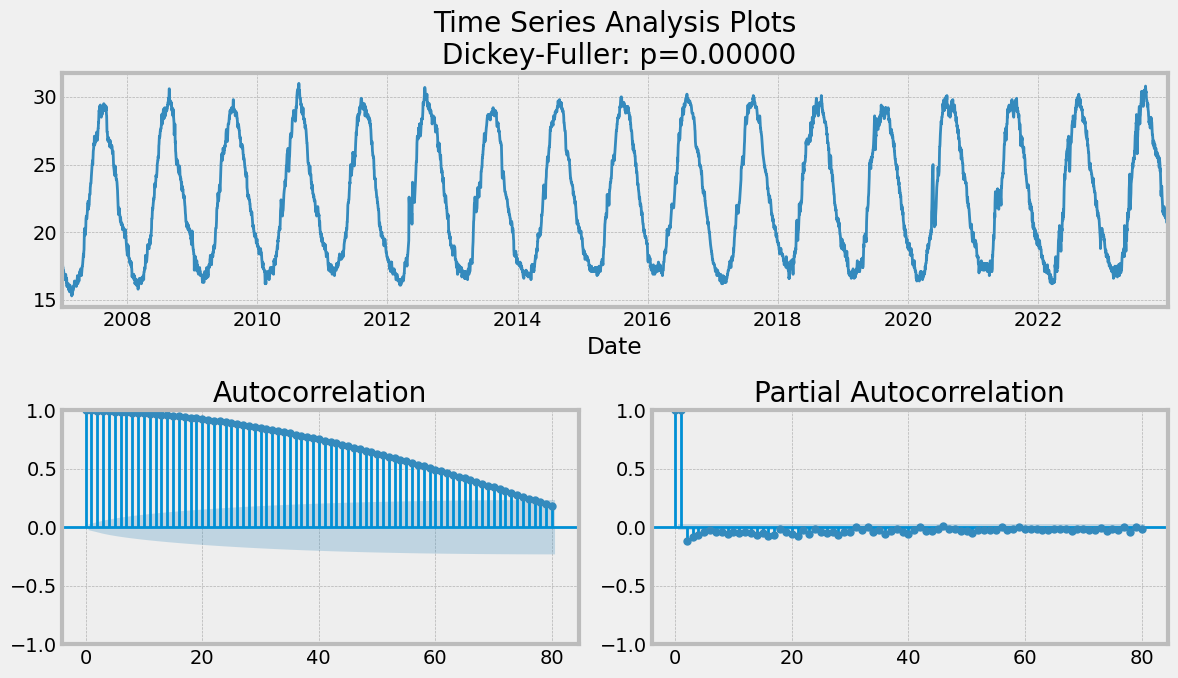

In [44]:
tsplot(df["SST(°C)"], lags=80)

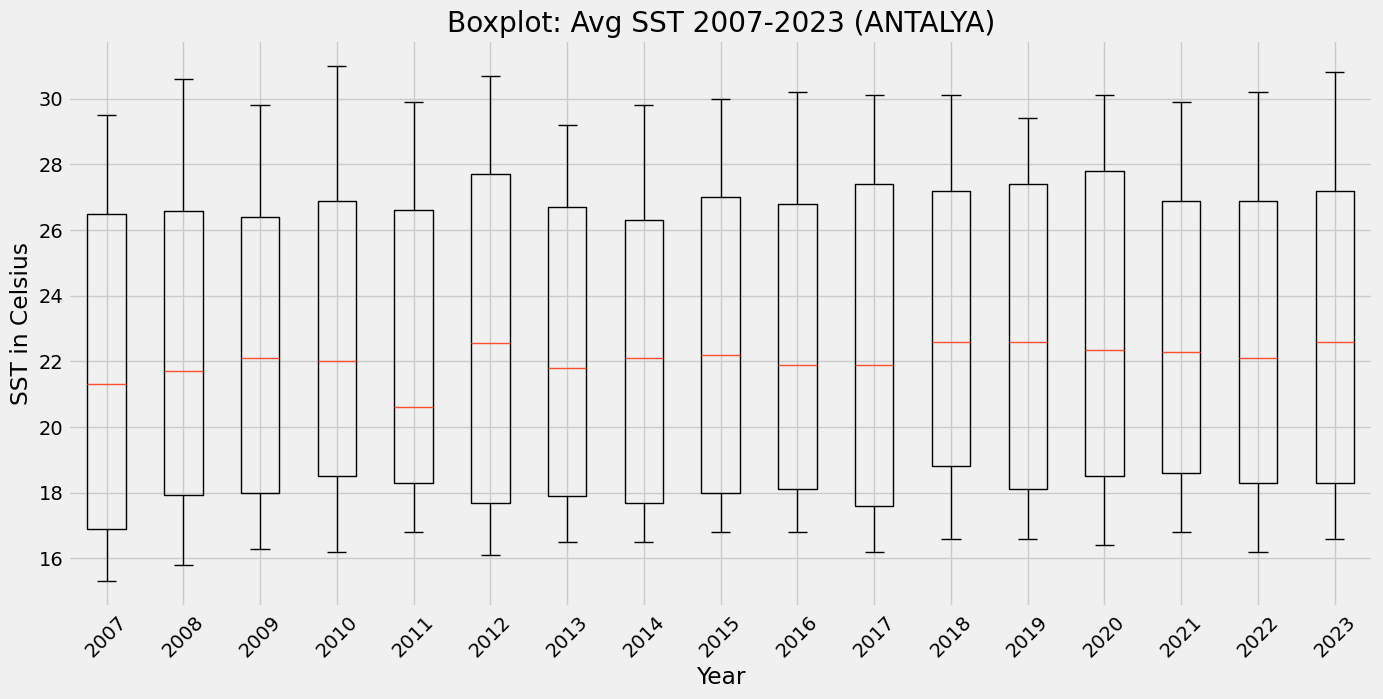

In [3]:
# Extract the year from the index and create a new column for it
df['Year'] = df.index.year

# Create a list to hold the data for each year
data_per_year = [df[df['Year'] == year]['SST(°C)'] for year in df['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df['Year'].unique())
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.title("Boxplot: Avg SST 2007-2023 (ANTALYA)")
plt.xticks(rotation=45)
plt.show()

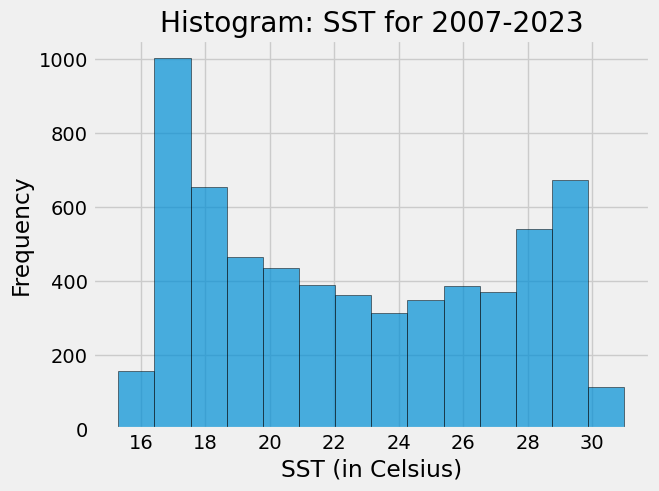

In [4]:
plt.hist(df["SST(°C)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("SST (in Celsius)")
plt.ylabel("Frequency")
plt.title("Histogram: SST for 2007-2023")


# Show the plot
plt.grid(True)
plt.show()

Available features: ['Temp(°C)', 'DewPoint(°C)', 'Humidi(%)', 'WindSpeed(mps)', 'Press(hpa)', 'SST(°C)', 'Year', 'Month', 'Season']


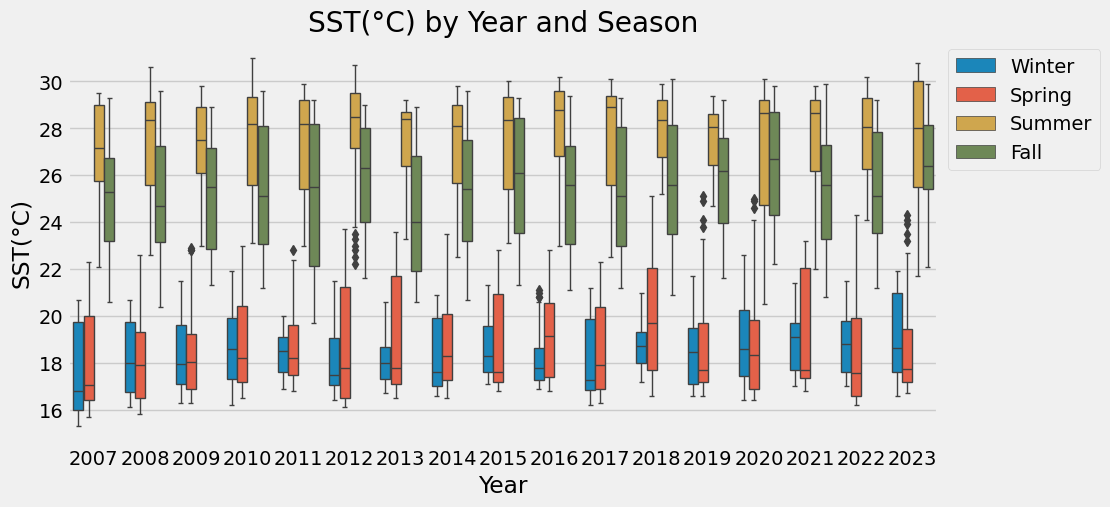

In [12]:
# Add 'year' and 'season' columns to the DataFrame
df = add_year_and_season(df)

# List all features
features = df.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'SST(°C)'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df, feature_to_plot)

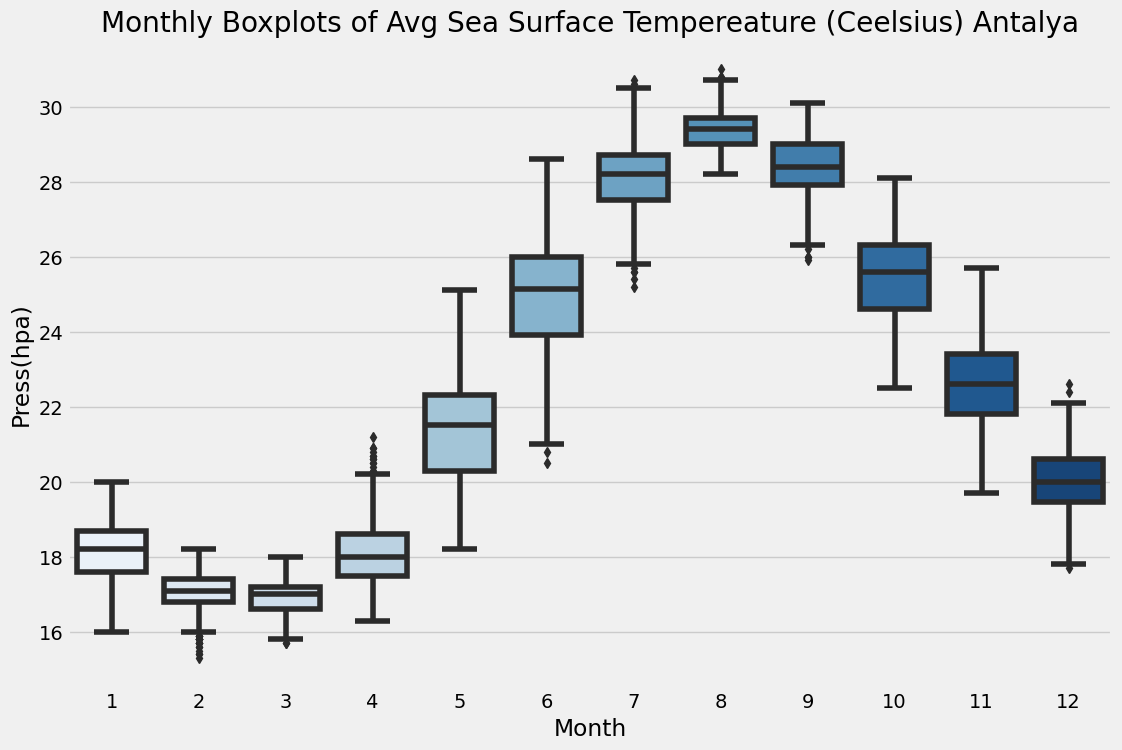

In [20]:
df['Year'] = df.index.year
df['Month'] = df.index.month

plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='SST(°C)', data=df, palette='Blues')
plt.title('Monthly Boxplots of Avg Sea Surface Tempereature (Ceelsius) Antalya')
plt.xlabel('Month')
plt.ylabel('Press(hpa)')
plt.show()

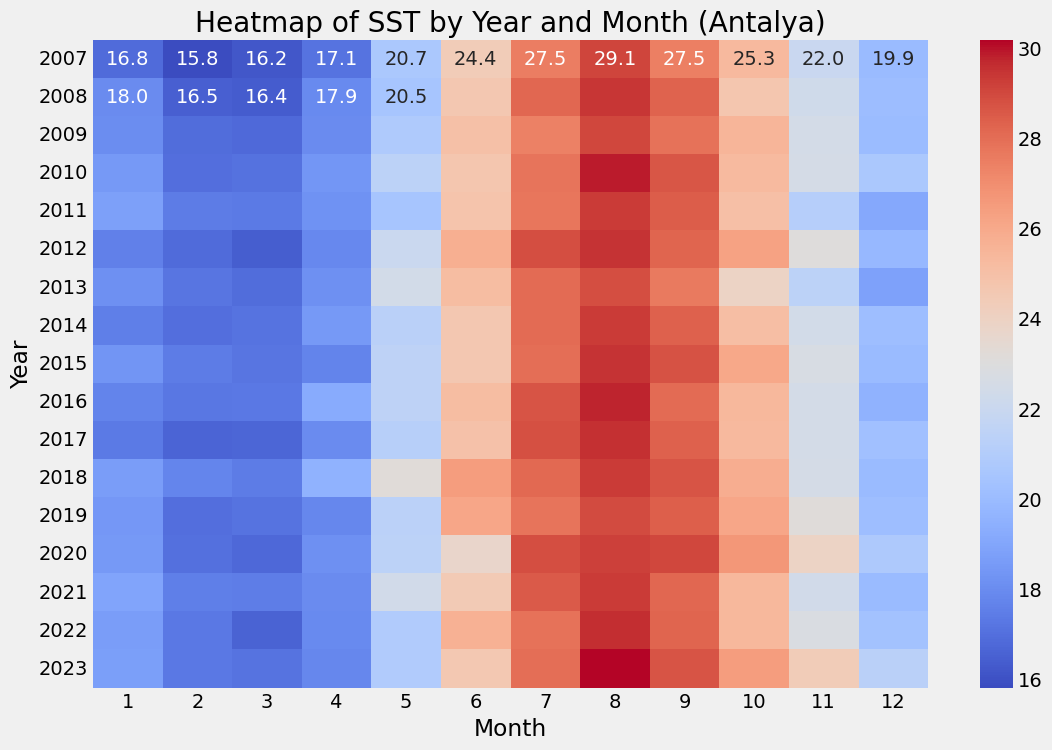

In [15]:
# Pivot the data to create a matrix for the heatmap
df_pivot = df.pivot_table(values='SST(°C)', index=df.index.year, columns=df.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of SST by Year and Month (Antalya)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [16]:
df["SST(°C)"].describe()

count    6209.000000
mean       22.578435
std         4.523440
min        15.300000
25%        18.100000
50%        22.100000
75%        27.000000
max        31.000000
Name: SST(°C), dtype: float64

# READ ADDITIONAL DATA

In [21]:
path1 = r"C:\Users\hp\Research-Try-ML\NATO-RESULTS\NATO-RESULTS.csv"
df1 = pd.read_csv(path1, encoding='latin1')
df1['Date'] = pd.to_datetime(df1['Date'])

# Set 'Date' column as the index
df1.set_index('Date', inplace=True)
df1.head(2)

Temp(°C)  DewPoint(°C)  Humidi(%)  WindSpeed(mps)  Press(hpa)  \
Date                                                                         
2008-01-01  10.555556      1.833333       62.4        2.726866  1009.14422   
2008-01-02  10.333333      7.944444       85.6        2.011623  1009.14422   

            SST(°C)  Cloud_Fraction  Long_wave_radiation_flux  \
Date                                                            
2008-01-01     18.5          0.9892                -54.527946   
2008-01-02     18.3          0.8545                -25.521553   

            Short_wave_radiation_flux  Precipitation  
Date                                                  
2008-01-01                  76.365265        3.87936  
2008-01-02                  45.635708        0.43956

In [22]:
df1.describe().round(3)

Temp(°C)  DewPoint(°C)  Humidi(%)  WindSpeed(mps)  Press(hpa)  \
count  5844.000      5844.000   5844.000        5844.000    5844.000   
mean     19.610        10.808     61.850           3.323    1006.465   
std       7.254         7.321     16.682           1.490       6.269   
min       1.389       -16.278     16.200           0.179     914.325   
25%      13.486         6.889     49.800           2.369    1002.371   
50%      19.000        11.111     64.800           2.906    1005.758   
75%      26.167        16.000     74.400           3.755    1009.144   
max      37.778        26.833    100.000          12.249    1026.076   

        SST(°C)  Cloud_Fraction  Long_wave_radiation_flux  \
count  5844.000        5844.000                  5844.000   
mean     22.621           0.402                   -65.526   
std       4.510           0.324                    23.545   
min      15.800           0.004                  -128.798   
25%      18.200           0.112                   -82.334   
50%      22.100           0.313                   -68.701   
75%      27.100           0.680                   -52.218   
max      31.000           1.000                     7.035   

       Short_wave_radiation_flux  Precipitation  
count                   5844.000       5844.000  
mean                     184.255          2.000  
std                       76.190          6.701  
min                        6.023          0.000  
25%                      118.134          0.000  
50%                      189.237          0.000  
75%                      253.045          0.371  
max                      311.233         96.703

In [23]:
import pandas as pd

def add_year_and_month(df1):
    df1['Year'] = df1.index.year
    df1['Month'] = df1.index.month
    return df1

# Precipitation

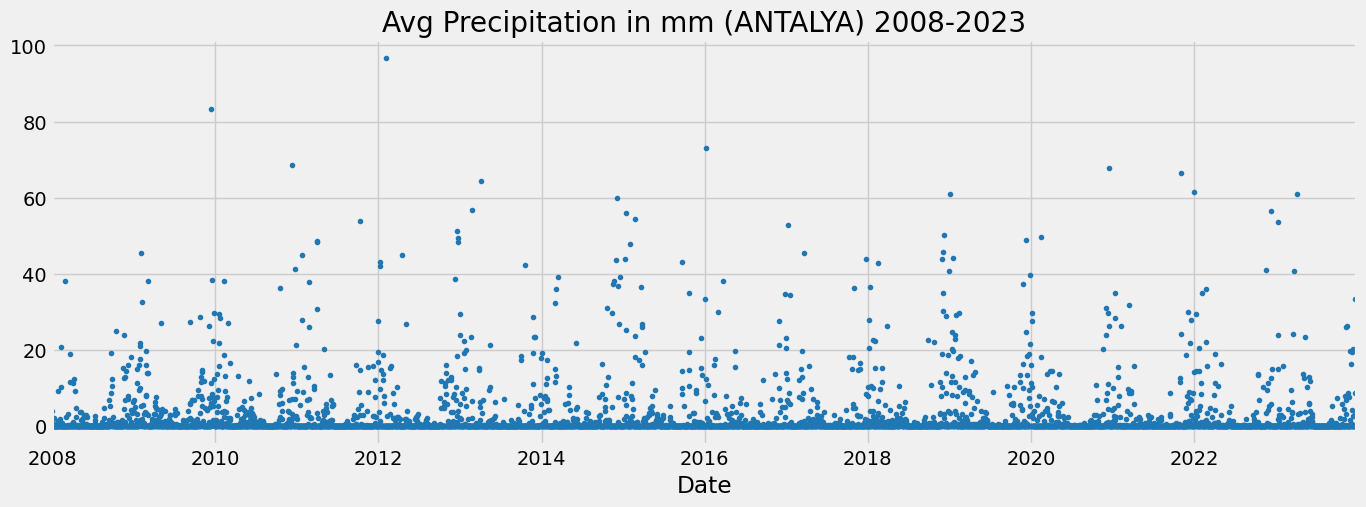

In [24]:
df1["Precipitation"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Precipitation in mm (ANTALYA) 2008-2023');

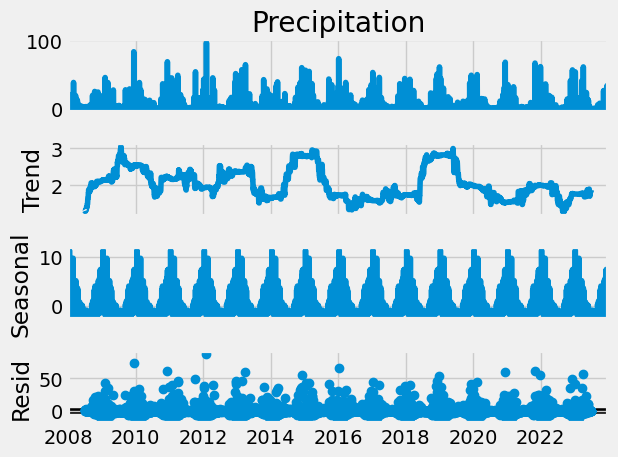

In [7]:
result1 = seasonal_decompose(df1['Precipitation'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

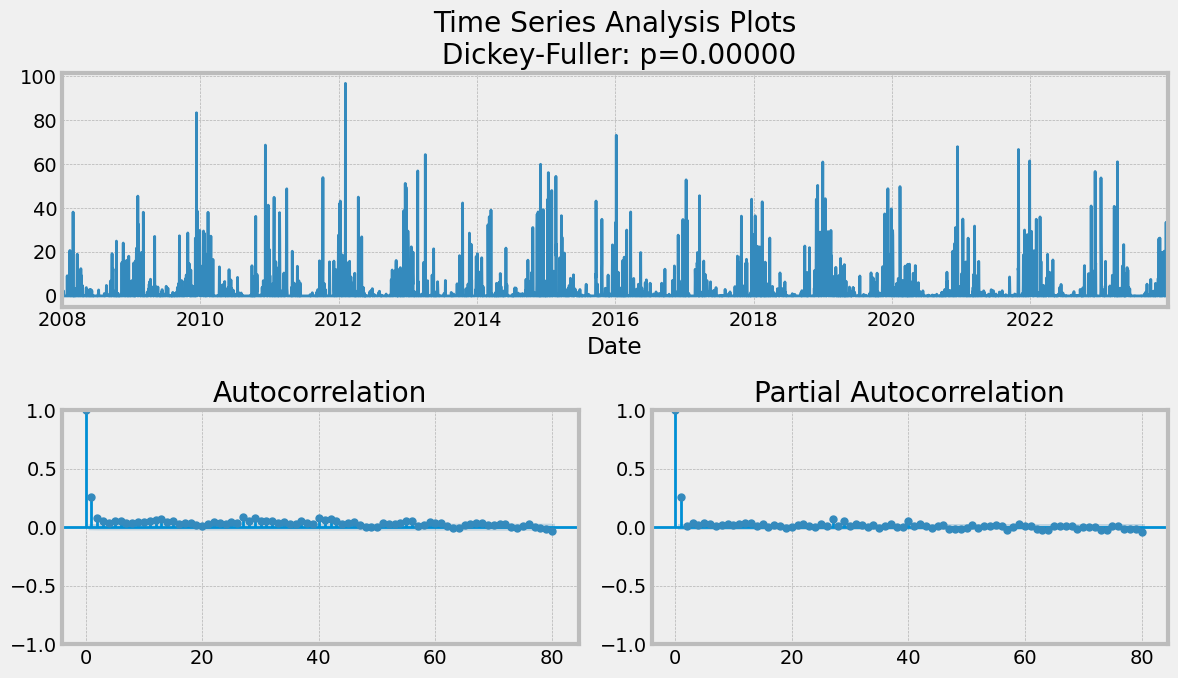

In [16]:
tsplot(df1["Precipitation"], lags=80)

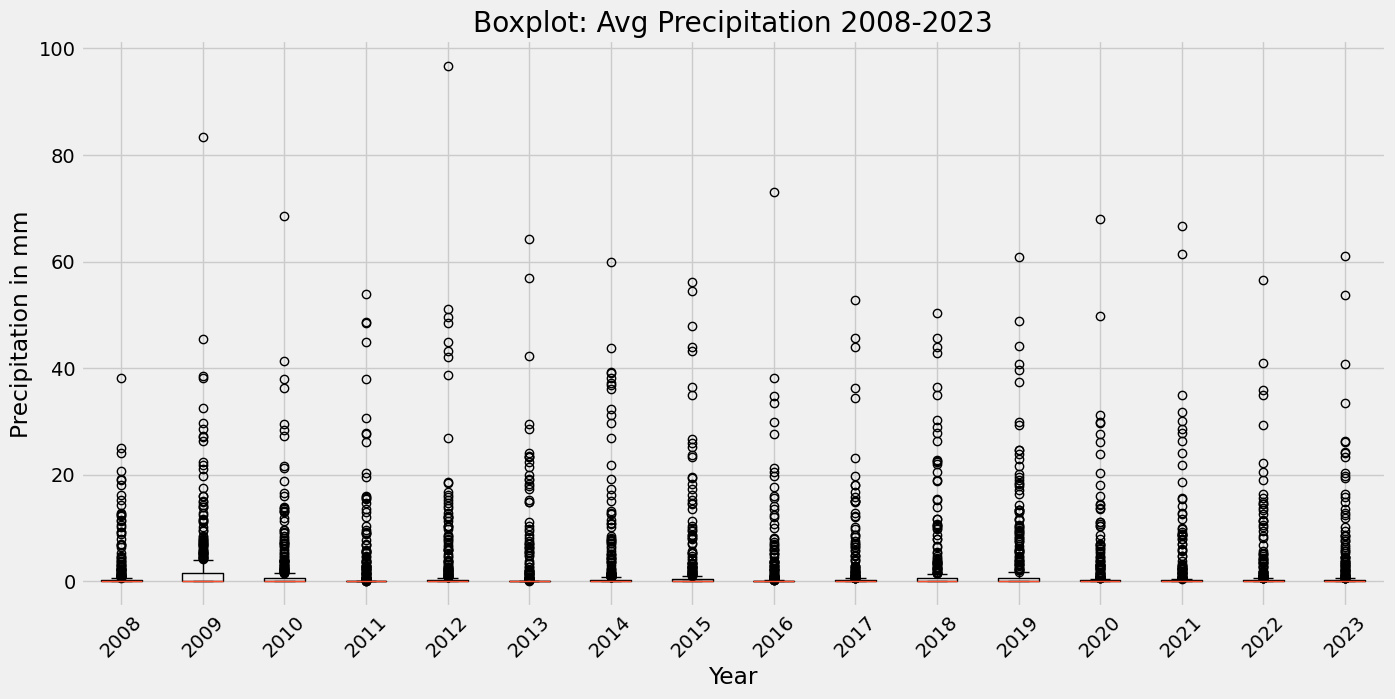

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'Date' is already set as the index
df1['Year'] = df1.index.year

# Create a list to hold the data for each year
data_per_year = [df1[df1['Year'] == year]['Precipitation'].dropna() for year in df1['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df1['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Precipitation in mm")
plt.title("Boxplot: Avg Precipitation 2008-2023")
plt.xticks(rotation=45)
plt.show()

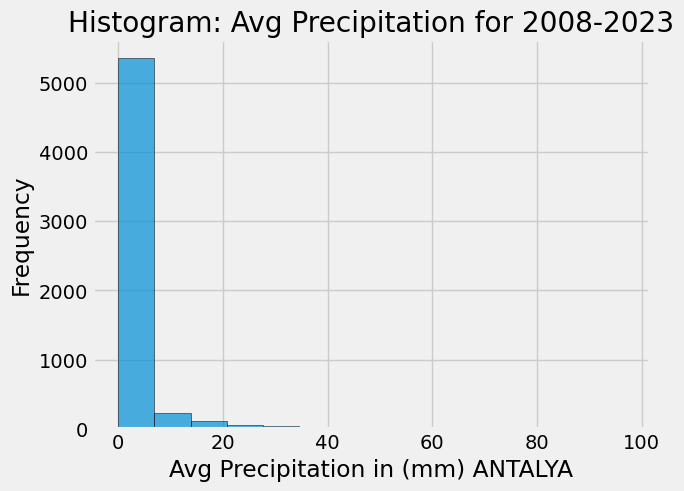

In [28]:
plt.hist(df1["Precipitation"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Avg Precipitation in (mm) ANTALYA")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Precipitation for 2008-2023")


# Show the plot
plt.grid(True)
plt.show()

Available features: ['Temp(°C)', 'DewPoint(°C)', 'Humidi(%)', 'WindSpeed(mps)', 'Press(hpa)', 'SST(°C)', 'Cloud_Fraction', 'Long_wave_radiation_flux', 'Short_wave_radiation_flux', 'Precipitation', 'Year', 'Month', 'Season']


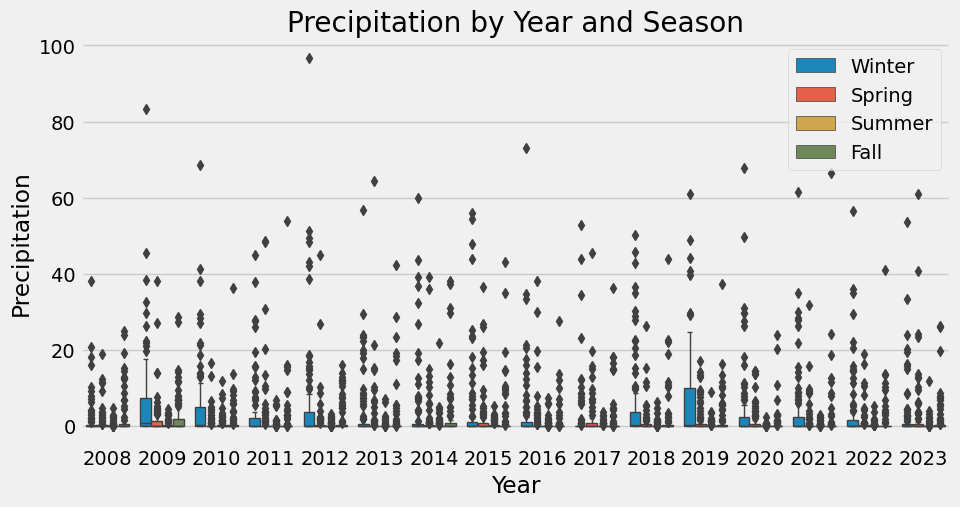

In [30]:
# Add 'year' and 'season' columns to the DataFrame
df1 = add_year_and_season(df1)

# List all features
features = df1.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'Precipitation'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df1, feature_to_plot);

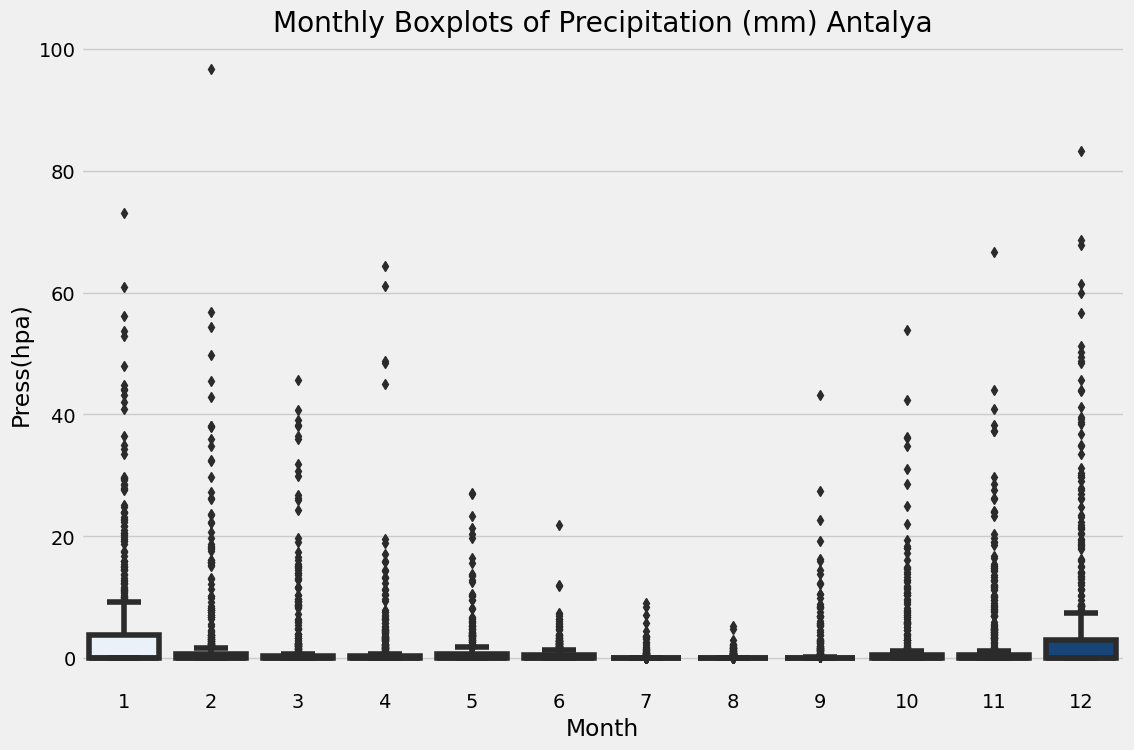

In [31]:
df['Year'] = df.index.year
df['Month'] = df.index.month

plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Precipitation', data=df1, palette='Blues')
plt.title('Monthly Boxplots of Precipitation (mm) Antalya')
plt.xlabel('Month')
plt.ylabel('Press(hpa)')
plt.show()

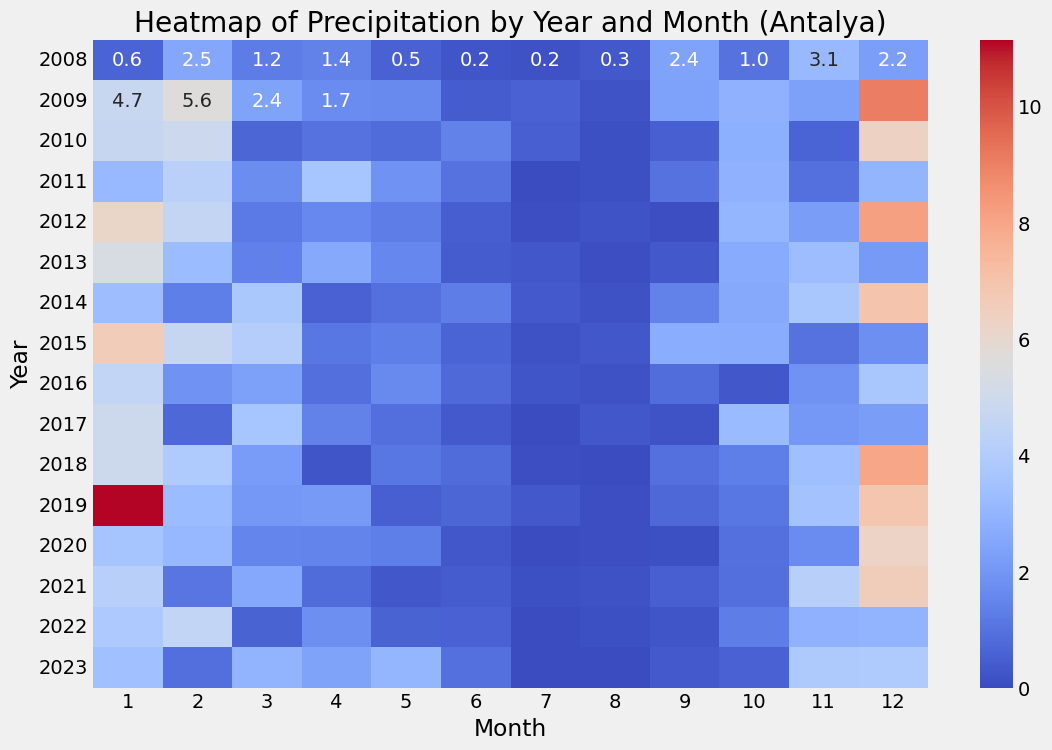

In [26]:
# Pivot the data to create a matrix for the heatmap
df1_pivot = df1.pivot_table(values='Precipitation', index=df1.index.year, columns=df1.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df1_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Precipitation by Year and Month (Antalya)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [21]:
df1["Precipitation"].describe()

count    5844.000000
mean        2.000448
std         6.701189
min         0.000000
25%         0.000000
50%         0.000000
75%         0.371250
max        96.703200
Name: Precipitation, dtype: float64

# Cloud Fraction

In [ ]:
df1["Cloud_Fraction"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Cloud_Fraction in % (ANTALYA) 2008-2023');

In [ ]:
result1 = seasonal_decompose(df1['Cloud_Fraction'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

In [ ]:
tsplot(df1["Cloud_Fraction"], lags=80)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'Date' is already set as the index
df1['Year'] = df1.index.year

# Create a list to hold the data for each year
data_per_year = [df1[df1['Year'] == year]['Cloud_Fraction'].dropna() for year in df1['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df1['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Cloud_Fraction in %")
plt.title("Boxplot: Avg Cloud_Fraction 2008-2023")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df1["Cloud_Fraction"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Avg Cloud_Fraction in (%) ANTALYA")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Cloud_Fraction for 2008-2023")


# Show the plot
plt.grid(True)
plt.show()

In [ ]:
def plot_feature_by_year_and_season(df, feature):
    plt.figure(figsize=(14, 8))
    
    # Define a custom color palette
    custom_palette = sns.color_palette("Set3", 4)  # Adjust the palette as needed
    
    # Create a boxplot for each season grouped by year
    sns.boxplot(x='year', y=feature, hue='season', data=df, palette=custom_palette)
    
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'{feature} by Year and Season in %')
    plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Extend the y-axis limits if needed
    plt.ylim(-0.1, 1.1)  # Adjust these values as needed
    
    plt.show()

# Example usage
plot_feature_by_year_and_season(df1, 'Cloud_Fraction')

In [ ]:
# Pivot the data to create a matrix for the heatmap
df1_pivot = df1.pivot_table(values='Cloud_Fraction', index=df1.index.year, columns=df1.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df1_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Cloud_Fraction by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
df1["Cloud_Fraction"].describe()

# Long wave radiation flux

In [ ]:
df1["Long_wave_radiation_flux"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Long_wave_radiation_flux in W/m² (ANTALYA) 2008-2023');

In [ ]:
result1 = seasonal_decompose(df1['Long_wave_radiation_flux'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

In [ ]:
tsplot(df1["Long_wave_radiation_flux"], lags=80)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'Date' is already set as the index
df1['Year'] = df1.index.year

# Create a list to hold the data for each year
data_per_year = [df1[df1['Year'] == year]['Long_wave_radiation_flux'].dropna() for year in df1['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df1['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Long_wave_radiation_flux in W/m²")
plt.title("Boxplot: Avg Long_wave_radiation_flux 2008-2023")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df1["Long_wave_radiation_flux"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Avg Long_wave_radiation_flux in (W/m²) ANTALYA")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Long_wave_radiation_flux for 2008-2023")


# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Add 'year' and 'season' columns to the DataFrame
df1 = add_year_and_season(df1)

# List all features
features = df1.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'Long_wave_radiation_flux'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df1, feature_to_plot)

In [ ]:
# Pivot the data to create a matrix for the heatmap
df1_pivot = df1.pivot_table(values='Long_wave_radiation_flux', index=df1.index.year, columns=df1.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df1_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Long_wave_radiation_flux by Year and Month in W/m²')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
df1["Long_wave_radiation_flux"].describe()

# Short wave radiation flux

In [ ]:
df1["Short_wave_radiation_flux"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg Short_wave_radiation_flux in W/m² (ANTALYA) 2008-2023');

In [ ]:
result1 = seasonal_decompose(df1['Long_wave_radiation_flux'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

In [ ]:
tsplot(df1["Short_wave_radiation_flux"], lags=80)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'Date' is already set as the index
df1['Year'] = df1.index.year

# Create a list to hold the data for each year
data_per_year = [df1[df1['Year'] == year]['Short_wave_radiation_flux'].dropna() for year in df1['Year'].unique()]

# Create the boxplot
plt.figure(figsize=(15, 7))
plt.boxplot(data_per_year, labels=df1['Year'].unique())
plt.xlabel("Year")
plt.ylabel("Short_wave_radiation_flux in W/m²")
plt.title("Boxplot: Avg Short_wave_radiation_flux 2008-2023")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df1["Short_wave_radiation_flux"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("Avg Short_wave_radiation_flux in (W/m²) ANTALYA")
plt.ylabel("Frequency")
plt.title("Histogram: Avg Short_wave_radiation_flux for 2008-2023")


# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Add 'year' and 'season' columns to the DataFrame
df1 = add_year_and_season(df1)

# List all features
features = df1.columns.tolist()
print("Available features:", features)

# Choose a feature to plot
feature_to_plot = 'Short_wave_radiation_flux'  # Change this to the feature you want to plot

# Plot the selected feature
plot_feature_by_year_and_season(df1, feature_to_plot)

In [ ]:
# Pivot the data to create a matrix for the heatmap
df1_pivot = df1.pivot_table(values='Short_wave_radiation_flux', index=df1.index.year, columns=df1.index.month)

plt.figure(figsize=(12, 8))
sns.heatmap(df1_pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Short_wave_radiation_flux by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
df1["Short_wave_radiation_flux"].describe()

# Mean line distribution for each feature

In [27]:
# # Calculate the mean of each feature
# mean = df.mean()

# # Create subplots
# fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 5 * len(df.columns)))

# # Plot each feature in a separate subplot
# for i, column in enumerate(df.columns):
#     ax = axes[i]
#     df[column].plot(kind='hist', bins=500, ax=ax)
#     ax.set_title(f'{column} Distribution', fontsize=12)
#     ax.set_xlabel(column, fontsize=12)
#     ax.set_ylabel('Frequency', fontsize=15)
#     ax.axvline(x=mean[column], color='r', linestyle='--', label='mean')
#     ax.legend(bbox_to_anchor=(1.04, 1))

# plt.tight_layout()
# plt.show()

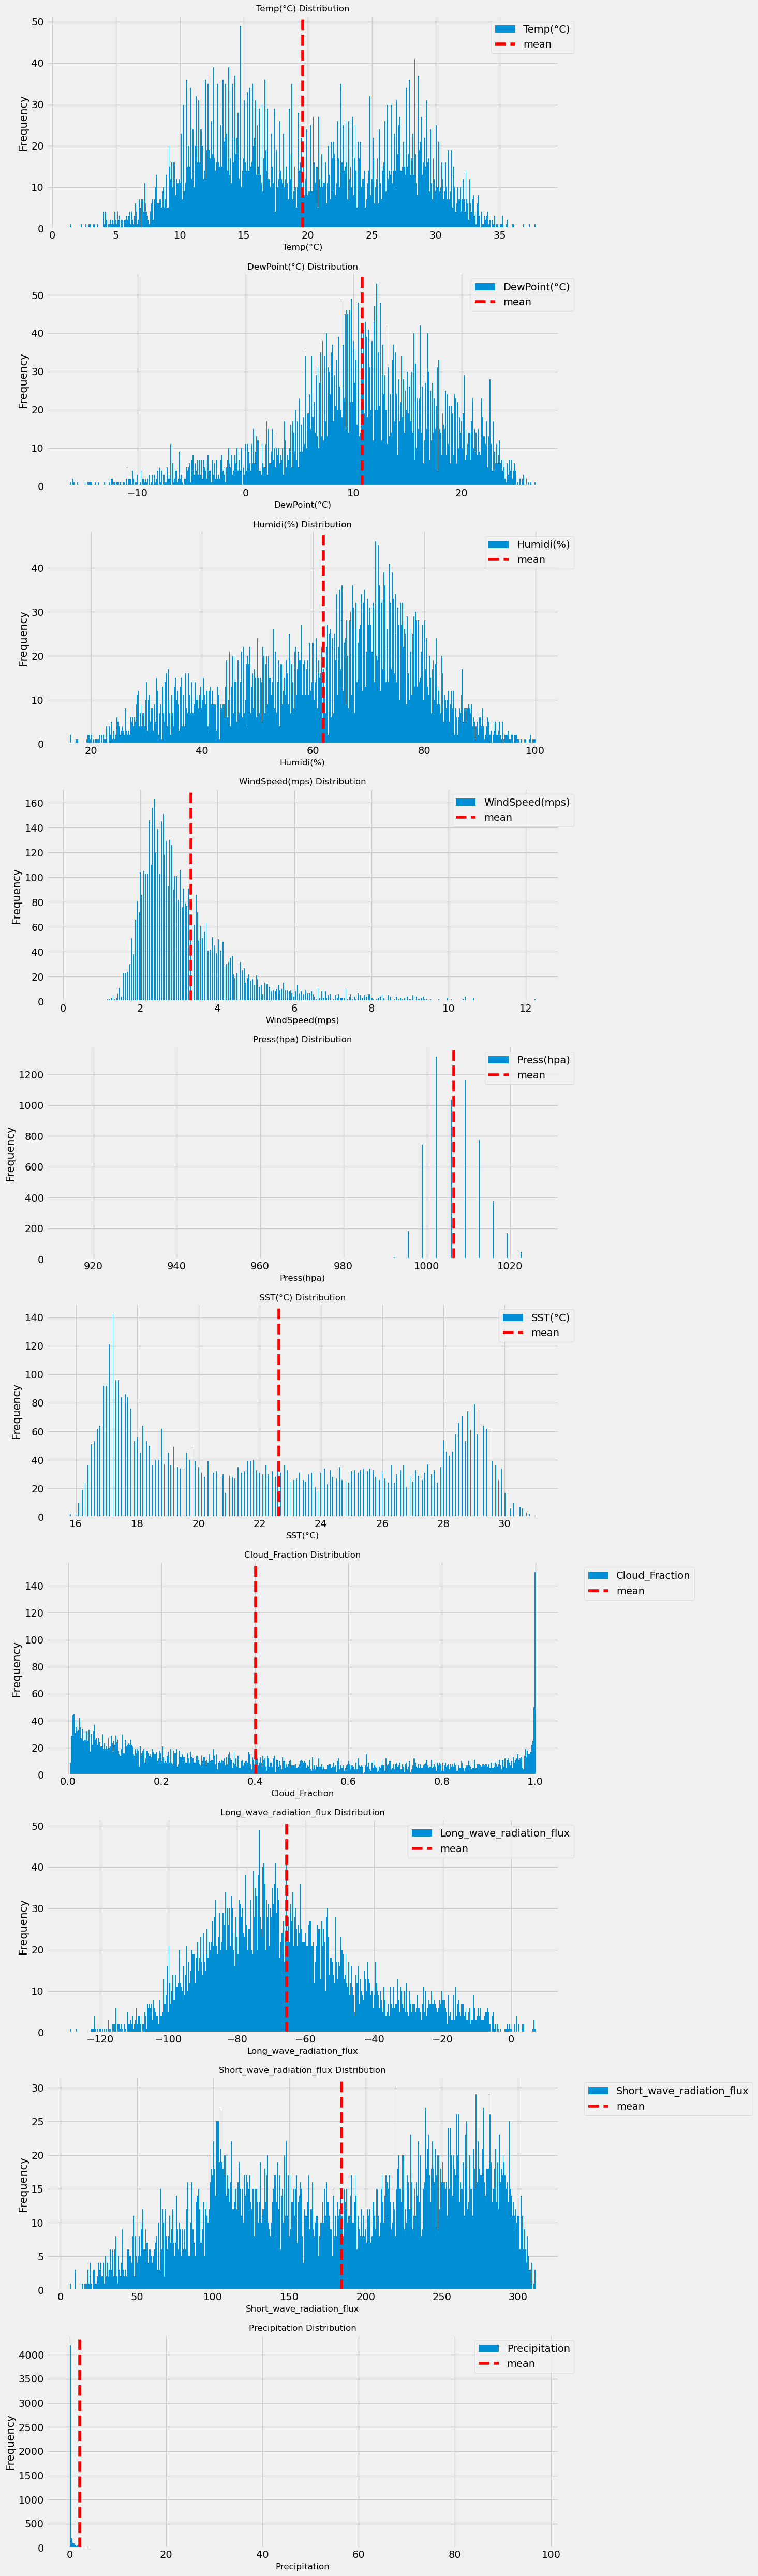

In [26]:
# Calculate the mean of each feature
mean = df1.mean()

# Create subplots
fig, axes = plt.subplots(nrows=len(df1.columns), ncols=1, figsize=(15, 5 * len(df1.columns)))

# Plot each feature in a separate subplot
for i, column in enumerate(df1.columns):
    ax = axes[i]
    df1[column].plot(kind='hist', bins=500, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=15)
    ax.axvline(x=mean[column], color='r', linestyle='--', label='mean')
    ax.legend(bbox_to_anchor=(1.04, 1))

plt.tight_layout()
plt.show()

# Correlation Coefficient relationships

In [17]:
print("Correlation Matrix of each Variable:")
df_cols.corr().round(3)

Correlation Matrix of each Variable:


Temp(°C)  DewPoint(°C)  Humidi(%)  WindSpeed(mps)  Press(hpa)  \
Temp(°C)           1.000         0.735     -0.279          -0.128      -0.605   
DewPoint(°C)       0.735         1.000      0.430          -0.486      -0.524   
Humidi(%)         -0.279         0.430      1.000          -0.522       0.055   
WindSpeed(mps)    -0.128        -0.486     -0.522           1.000      -0.076   
Press(hpa)        -0.605        -0.524      0.055          -0.076       1.000   
SST(°C)            0.882         0.673     -0.224          -0.136      -0.492   

                SST(°C)  
Temp(°C)          0.882  
DewPoint(°C)      0.673  
Humidi(%)        -0.224  
WindSpeed(mps)   -0.136  
Press(hpa)       -0.492  
SST(°C)           1.000

C:\Users\hp\AppData\Local\Temp\ipykernel_17504\2637390686.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


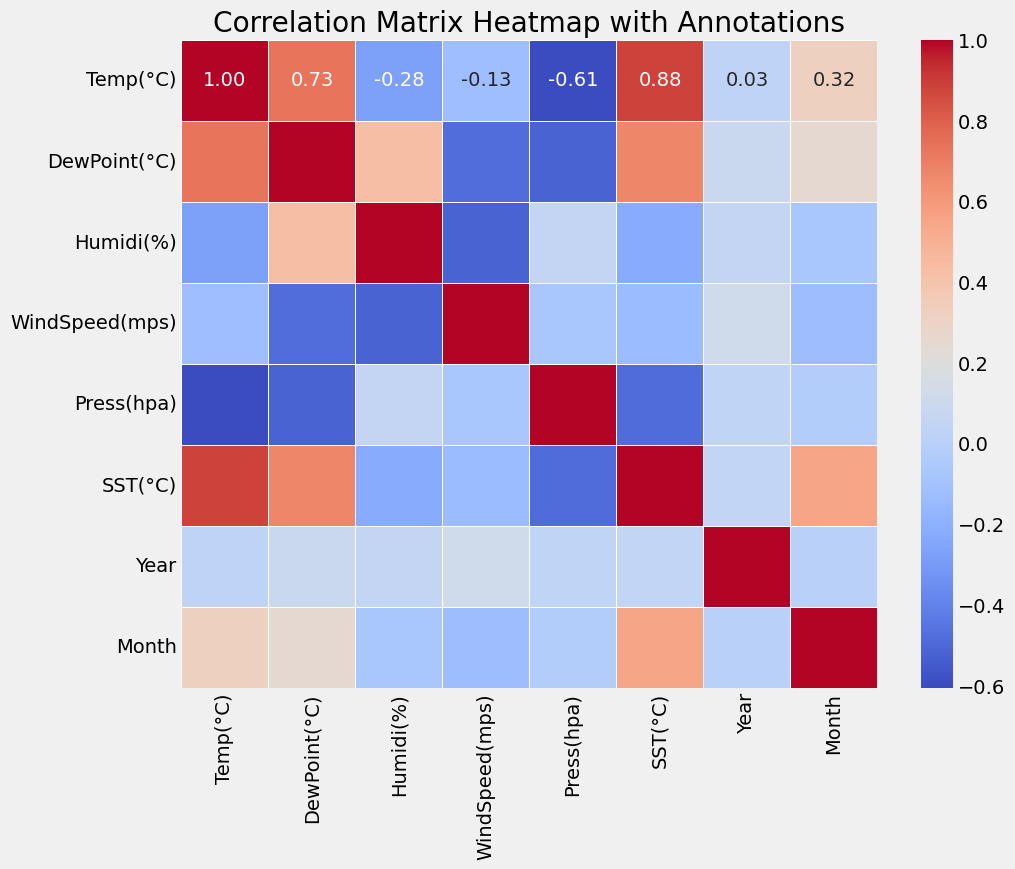

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
# Create a heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix Heatmap with Annotations")
plt.show()

# Describtive Statistics

In [ ]:
df_cols.describe().round(3)

# Mersin VS. Antalya

## load mersin

In [ ]:
path1 = r"C:\Users\hp\Research-Try-ML\Mersin_earthdata\Mersin_earthdata\SST_Mersin.csv"
df1 = pd.read_csv(path1, encoding='latin1')

df1 = df1.set_index('Date')

#Change Datetime Datatype to Datetime
df1.index = pd.to_datetime(df1.index)
df1

In [ ]:
df1["SST"] = df1["SST"] - 273.15
df1

In [ ]:
# Filter the DataFrame to include only data from January 1, 2007, onwards
df1_filt = df1.loc['2007-01-01':]

# Display the filtered DataFrame
df1_filt

## comparison

In [ ]:
df["SST(°C)"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg SST in Celsius (ANTALYA)');

In [ ]:
df1_filt["SST"].plot(style = '.', 
        figsize = (15, 5), 
        color = color_pal[0], 
        title = 'Avg SST in Celsius (MERSIN)');

In [ ]:
result1 = seasonal_decompose(df['SST(°C)'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

In [ ]:
result1 = seasonal_decompose(df1_filt['SST'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

In [ ]:
plt.hist(df["SST(°C)"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("SST (in Celsius)")
plt.ylabel("Frequency")
plt.title("Histogram: SST for 2007-2023 (ANTALYA)")


# Show the plot
plt.grid(True)
plt.show()

In [ ]:
plt.hist(df1_filt["SST"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("SST (in Celsius)")
plt.ylabel("Frequency")
plt.title("Histogram: SST for 2007-2023 (MERSIN)")


# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data
filtered_sst = df[df["SST(°C)"] > 29]["SST(°C)"]

# Plot the filtered SST(°C) data
fig, ax = plt.subplots(figsize=(15, 5))
filtered_sst.plot(ax=ax, style='.')
plt.title('Filtered SST(°C) Values Above 29 (ANTALYA)')
plt.xlabel('Date')
plt.ylabel('SST(°C)')
plt.legend(['SST(°C)'], bbox_to_anchor=(1.04, 1))

# Set the x-axis limits
ax.set_xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2023-12-31'))

# Format the x-axis to show the correct dates
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(pd.plotting.DateFormatter('%Y-%m'))

plt.show()

In [ ]:
filtered_sst1 = df1_filt[df1_filt["SST"] > 30]["SST"]

# Plot the filtered SST(°C) data
filtered_sst1.plot(figsize=(15, 5), style='.')
plt.title('Filtered SST(°C) Values Below 16 (Mersin)')
plt.xlabel('Date')
plt.ylabel('SST')
plt.legend(['SST'], bbox_to_anchor=(1.04, 1))
plt.show()